# Plotting separate PTE terms for all simulations 

Ting-Chen Chen (ting-chen.chen@kit.edu) 

In [1]:
dt = 6
data_res  = '1x1latlon'
if   dt == 1:
     data_dt = '1hrly'
elif dt == 6:
     data_dt = '6hrly'
        
p2level = 50
boxsize =  6

In [2]:
#####################################################
# cyclone specific data
#####################################################
# channel_Xkm_0001: control simulations
# channel_Xkm_0002: +4K, qv consistent with T
# channel_Xkm_0003: +4k, qv from control
# channel_Xkm_0004: +temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0005: +tropical temperature anomaly from MPI-ESM1-2-LR far future
# channel_Xkm_0006: +polar temperature anomaly from MPI-ESM1-2-LR far future

# Note that the  2-km experiments contain outputs every 6 hrs
# Note that the 80-km experiments contain outputs every 1 hrs


expname = {
      1: 'CTL',    
      2: 'T+4K',
      3: 'T+4K_RH-',
      4: 'T+anom',
      5: 'T+TRanom_TR',
      6: 'T+POanom'
         }

exp80 = { 
      1:'channel_80km_0001',
      2:'channel_80km_0002',
      3:'channel_80km_0003',
      4:'channel_80km_0004',
      5:'channel_80km_0005',
      6:'channel_80km_0006',
      }

exp2 = { 
      1:'channel_2km_0001',
      2:'channel_2km_0002',
      3:'channel_2km_0003',
      4:'channel_2km_0004',
      5:'channel_2km_0005',
      6:'channel_2km_0006',
      }

exp2n = { 
      1:'channel_2km_0001n',
      2:'channel_2km_0002n',
      3:'channel_2km_0003n',
      4:'channel_2km_0004n',
      5:'channel_2km_0005n',
      6:'channel_2km_0006n',
      }



In [3]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.ndimage
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as patches
import psutil
import datetime
import time as tm
import seaborn as sns
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import warnings
warnings.filterwarnings("ignore")

In [4]:
def relativemag(x, y):
    rmag=abs(x)/abs(y)*100.    
    return rmag


In [5]:
#res='80km'
#####################################################
# Read in PTE track data from file
#####################################################
#Cyclone Track
#path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_PTE_timeseries/'
#path_track = '/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/PTE/cyclone_PTE_timeseries/'
path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_PTE_timeseries/'
dur = {}
pmin = {}
dpmin = {}
dp = {}
dfi = {}
ep = {}
itt = {}
eq1res = {}
tadv = {}
vmt = {}
sta = {}
omg = {}
diab = {}
diablh = {}
diabpc = {}
diablwr= {}
diabswr= {}
diabtur= {}
eq2res = {}
diabptend = {}

tadv_perc={}
diab_perc={}
for res in ['80km','2km']:
    for i in range(1,7):
        #print(exp80[i])
        if res == '80km':
            exp=exp80
        else:
            exp=exp2
        ifile    ='PTE_for_'+exp[i]+'_'+data_dt+'_'+data_res+'_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_ddt_temp.csv'
        print(ifile)
        df_track = pd.read_csv(path_track+ifile)
        #ntrack = len(df_track['lat']) 
        dur[exp[i]] = df_track['time']+1
        #lon  = df_track['lon']
        #lat  = df_track['lat'] 
        pmin[exp[i]]      = df_track['pmin']
        dpmin[exp[i]]     = df_track['pmin'].diff()
        dp[exp[i]]        = df_track['dp'] 
        dfi[exp[i]]       = df_track['dfi']                      
        ep[exp[i]]        = df_track['ep']    
        itt[exp[i]]       = df_track['itt'] 
        eq1res[exp[i]]    = df_track['eq1res']                     
        tadv[exp[i]]      = df_track['tadv']
        vmt[exp[i]]       = df_track['vmt']
        sta[exp[i]]       = df_track['sta']*100.
        omg[exp[i]]       = df_track['omg']*100.
        diab[exp[i]]      = df_track['diab']
        diablh[exp[i]]    = df_track['diablh']
        diabpc[exp[i]]    = df_track['diabpc']
        diablwr[exp[i]]   = df_track['diablwr']
        diabswr[exp[i]]   = df_track['diabswr']
        diabtur[exp[i]]   = df_track['diabtur']
        eq2res[exp[i]]    = df_track['eq2res'] 
        diabptend[exp[i]] = df_track['diabptend'] 
        
        tadv_perc[exp[i]] = df_track.apply(lambda x: relativemag(x['tadv'], x['dp']), axis=1)
        diab_perc[exp[i]] = df_track.apply(lambda x: relativemag(x['diab'], x['dp']), axis=1)

dpmin[exp80[1]]

PTE_for_channel_80km_0001_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_80km_0002_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_80km_0003_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_80km_0004_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_80km_0005_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_80km_0006_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_2km_0001_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_2km_0002_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_2km_0003_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_2km_0004_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_2km_0005_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv
PTE_for_channel_2km_0006_6hrly_1x1latlon_upper50hPa_box6_ddt_temp.csv


0          NaN
1    -3.120056
2     0.795532
3    -0.630554
4     1.144775
5    -0.914795
6     0.026428
7    -0.866272
8    -0.972046
9    -1.486328
10   -2.345276
11   -3.554749
12   -4.082764
13   -5.890381
14   -6.641052
15   -5.807800
16   -2.791382
17   -2.293579
18   -0.861755
19   -1.989380
20   -2.324951
21   -1.101074
22   -1.309326
23   -3.585632
24   -4.559937
25   -2.231689
26   -1.276978
27    1.352478
28    1.773743
29    0.908447
30   -0.455688
31    0.352600
32    0.692078
33    1.339539
34    2.637817
35    2.532654
36    2.148376
Name: pmin, dtype: float64

In [6]:
print(tadv_perc[exp[1]])

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
5             NaN
6             NaN
7      163.950067
8      452.393031
9      265.168674
10     217.400874
11     142.869154
12     225.164894
13     282.920193
14     196.450266
15     249.235327
16     704.798093
17     553.668335
18     578.472633
19     380.403648
20     729.950861
21     392.149637
22     576.763919
23    1611.152692
24     430.491319
25     587.246092
26     424.539901
27     744.182521
28     419.050139
29     705.510069
30     482.866214
31     856.759515
32    1245.043266
33     747.795436
34     401.093221
35     566.840108
36     813.122989
dtype: float64


# PLOT the time evolution of the cyclone-associated PTE 

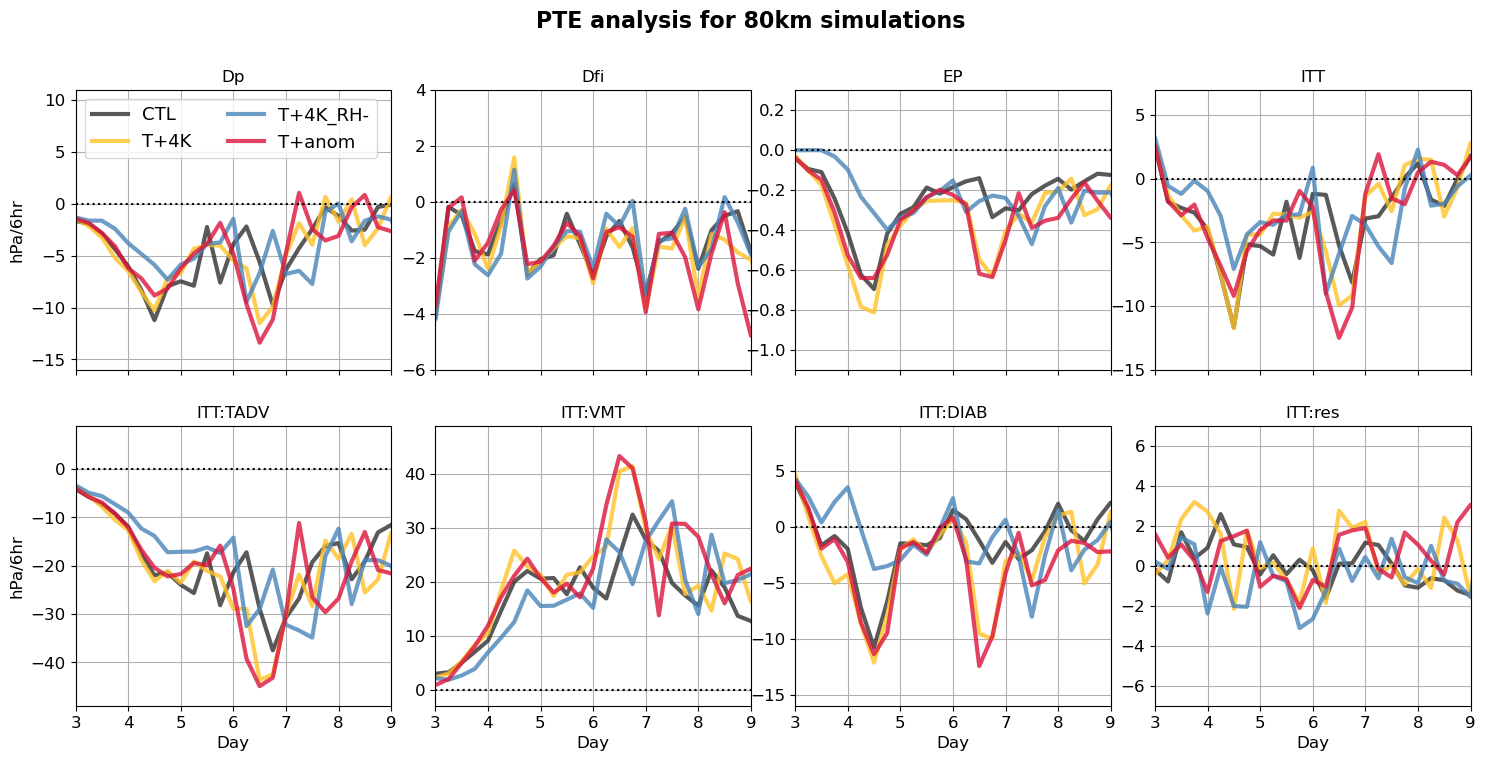

In [7]:
# For 80 km results

exp=exp80
res='80km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    
ax[0,0].set_title('Dp')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res')


ax[0,0].set_ylim((-16, 11))
ax[0,1].set_ylim((-6, 4))
ax[0,2].set_ylim((-1.1, 0.3))
ax[0,3].set_ylim((-15, 7))
ax[1,0].set_ylim(-49, 9)
ax[1,1].set_ylim(-3, 49)
ax[1,2].set_ylim(-16, 9)
ax[1,3].set_ylim(-7, 7)

ax[1,0].set_xlabel('Day', fontsize=12)
ax[1,1].set_xlabel('Day', fontsize=12)
ax[1,2].set_xlabel('Day', fontsize=12)
ax[1,3].set_xlabel('Day', fontsize=12)

ax[0,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0,0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k')
ax[0,1].axhline(y=0,linestyle=':', color='k')
ax[0,2].axhline(y=0,linestyle=':', color='k')
ax[0,3].axhline(y=0,linestyle=':', color='k')
ax[1,0].axhline(y=0,linestyle=':', color='k')
ax[1,1].axhline(y=0,linestyle=':', color='k')
ax[1,2].axhline(y=0,linestyle=':', color='k')
ax[1,3].axhline(y=0,linestyle=':', color='k')
ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.14)
fig.suptitle('PTE analysis for '+res+' simulations',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_Sim1234_'+res+'_Allterms_in_onefig.png',
#               bbox_inches='tight',dpi=100)

plt.show()



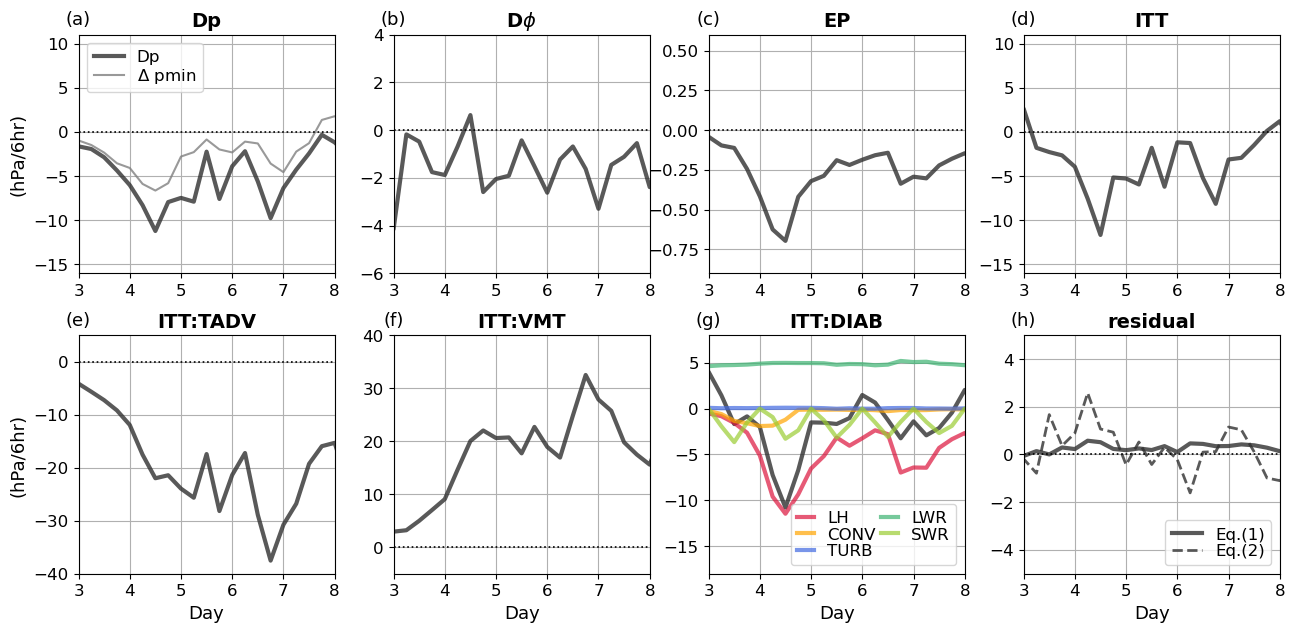

In [8]:
# For CTL 2km vs 80 km results

exp=exp80


# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(15.5,7), sharex=False, sharey=False)
for i in range(1,2): # loop over simulations
    exp=exp80
    ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=3,  label='Dp', alpha=0.8)
    ax[0,0].plot(dur[exp[i]], dpmin[exp[i]], color='gray',
               linewidth=1.5, label=r'$\Delta$'' pmin', alpha=0.8)
    ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=3, alpha=0.8)
    ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,2].plot(dur[exp[i]], diablh[exp[i]], color='crimson',
               linewidth=3, alpha=0.7, label='LH')
    ax[1,2].plot(dur[exp[i]], diabpc[exp[i]], color='orange',
               linewidth=3, alpha=0.7, label='CONV')
    ax[1,2].plot(dur[exp[i]], diabtur[exp[i]], color='royalblue',
               linewidth=3, alpha=0.7, label='TURB')
    ax[1,2].plot(dur[exp[i]], diablwr[exp[i]], color='mediumseagreen',
               linewidth=3 ,alpha=0.7, label='LWR')
    ax[1,2].plot(dur[exp[i]], diabswr[exp[i]], color='yellowgreen',
               linewidth=3, alpha=0.7, label='SWR')
    ax[1,3].plot(dur[exp[i]], eq1res[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8, label='Eq.(1)')
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linestyle='dashed',
               linewidth=2,  alpha=0.8, label='Eq.(2)')
    #exp=exp2
    #ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', label='2 km', alpha=0.8)
    #ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3,linestyle='dotted',  alpha=0.8)
    
ax[0,0].set_title('Dp', weight='bold',fontsize=14)
ax[0,1].set_title('D'r'$\phi$', weight='bold',fontsize=14)
ax[0,2].set_title('EP', weight='bold',fontsize=14)
ax[0,3].set_title('ITT', weight='bold',fontsize=14)
ax[1,0].set_title('ITT:TADV', weight='bold',fontsize=14)
ax[1,1].set_title('ITT:VMT', weight='bold',fontsize=14)
ax[1,2].set_title('ITT:DIAB', weight='bold',fontsize=14)
ax[1,3].set_title('residual', weight='bold',fontsize=14)

plt.text(0, 1.1, '(a)', ha='center', va='top', transform=ax[0,0].transAxes, fontsize=13) 
plt.text(0, 1.1, '(b)', ha='center', va='top', transform=ax[0,1].transAxes, fontsize=13) 
plt.text(0, 1.1, '(c)', ha='center', va='top', transform=ax[0,2].transAxes, fontsize=13) 
plt.text(0, 1.1, '(d)', ha='center', va='top', transform=ax[0,3].transAxes, fontsize=13) 
plt.text(0, 1.1, '(e)', ha='center', va='top', transform=ax[1,0].transAxes, fontsize=13) 
plt.text(0, 1.1, '(f)', ha='center', va='top', transform=ax[1,1].transAxes, fontsize=13) 
plt.text(0, 1.1, '(g)', ha='center', va='top', transform=ax[1,2].transAxes, fontsize=13) 
plt.text(0, 1.1, '(h)', ha='center', va='top', transform=ax[1,3].transAxes, fontsize=13) 

ax[0,0].set_ylim((-16, 11))
ax[0,1].set_ylim((-6, 4))
ax[0,2].set_ylim((-0.9, 0.6))
ax[0,3].set_ylim((-16, 11))
ax[1,0].set_ylim(-40, 5)
ax[1,1].set_ylim(-5, 40)
ax[1,2].set_ylim(-18, 8)
ax[1,3].set_ylim(-5, 5)

ax[1,0].set_xlabel('Day', fontsize=13)
ax[1,1].set_xlabel('Day', fontsize=13)
ax[1,2].set_xlabel('Day', fontsize=13)
ax[1,3].set_xlabel('Day', fontsize=13)

ax[0,0].set_ylabel('(hPa/'+str(dt)+'hr)', fontsize=13)
ax[1,0].set_ylabel('(hPa/'+str(dt)+'hr)', fontsize=13)
ax[0,0].set_xlim((3, 8))
ax[0,1].set_xlim((3, 8))
ax[0,2].set_xlim((3, 8))
ax[0,3].set_xlim((3, 8))
ax[1,0].set_xlim((3, 8))
ax[1,1].set_xlim((3, 8))
ax[1,2].set_xlim((3, 8))
ax[1,3].set_xlim((3, 8))

#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,1].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,2].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,3].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,0].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,1].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
#ax[1,2].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,3].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
#ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)
ax[0,0].legend(loc='upper left', fontsize=12,labelspacing=0.1, columnspacing=0,handlelength=1.8)
ax[1,2].legend(ncol=2, loc='lower right', fontsize=12,labelspacing=0.1, columnspacing=0.3,handlelength=1)
ax[1,3].legend(loc='lower right', fontsize=12,labelspacing=0.1, columnspacing=0,handlelength=1.8)
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.23, hspace=0.26)
#fig.suptitle('PTE analysis for 80-km CTL',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('Fig_cyclonePTEtimeseries_CTLonly_80km_Allterms_in_onefig.png',
#               bbox_inches='tight',dpi=100)

plt.show()



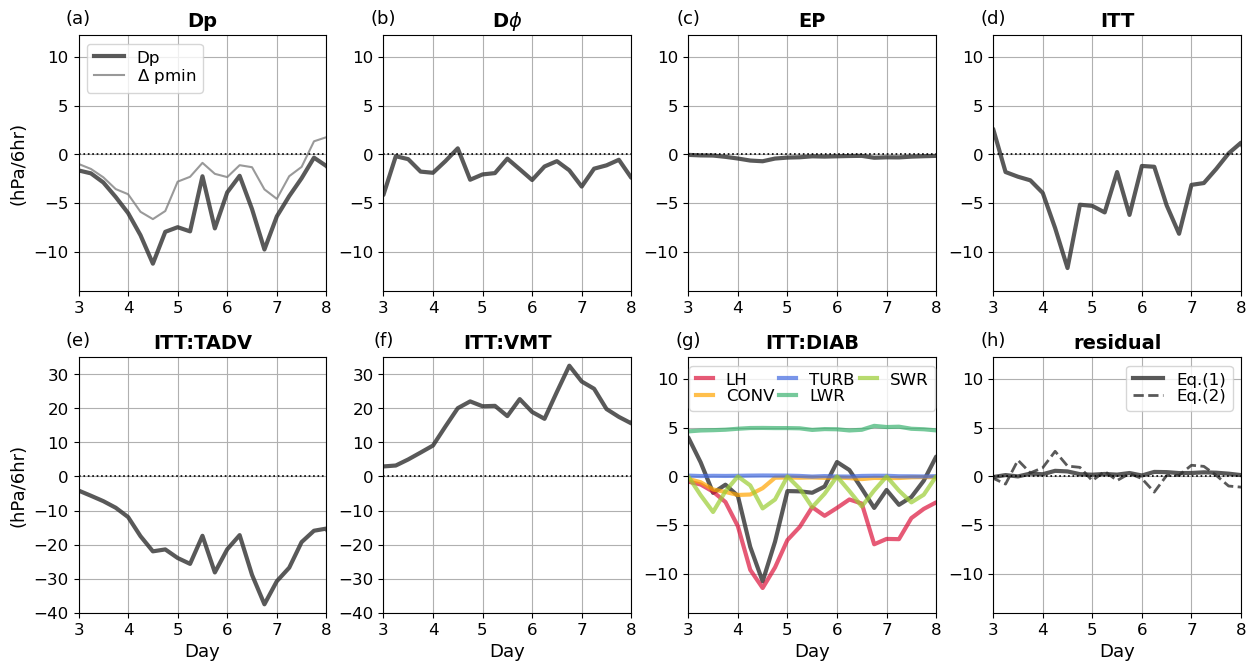

In [9]:
# For CTL 2km vs 80 km results
# Same y axis range ------------------------------------------
exp=exp80


# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(15,7.5), sharex=False, sharey=False)
for i in range(1,2): # loop over simulations
    exp=exp80
    ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=3,  label='Dp', alpha=0.8)
    ax[0,0].plot(dur[exp[i]], dpmin[exp[i]], color='gray',
               linewidth=1.5, label=r'$\Delta$'' pmin', alpha=0.8)
    ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=3, alpha=0.8)
    ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,2].plot(dur[exp[i]], diablh[exp[i]], color='crimson',
               linewidth=3, alpha=0.7, label='LH')
    ax[1,2].plot(dur[exp[i]], diabpc[exp[i]], color='orange',
               linewidth=3, alpha=0.7, label='CONV')
    ax[1,2].plot(dur[exp[i]], diabtur[exp[i]], color='royalblue',
               linewidth=3, alpha=0.7, label='TURB')
    ax[1,2].plot(dur[exp[i]], diablwr[exp[i]], color='mediumseagreen',
               linewidth=3 ,alpha=0.7, label='LWR')
    ax[1,2].plot(dur[exp[i]], diabswr[exp[i]], color='yellowgreen',
               linewidth=3, alpha=0.7, label='SWR')
    ax[1,3].plot(dur[exp[i]], eq1res[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8, label='Eq.(1)')
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linestyle='dashed',
               linewidth=2,  alpha=0.8, label='Eq.(2)')
    #exp=exp2
    #ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', label='2 km', alpha=0.8)
    #ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
    #           linewidth=3,  linestyle='dotted', alpha=0.8)
    #ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
    #           linewidth=3, linestyle='dotted', alpha=0.8)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3,linestyle='dotted',  alpha=0.8)
    
ax[0,0].set_title('Dp', weight='bold',fontsize=14)
ax[0,1].set_title('D'r'$\phi$', weight='bold',fontsize=14)
ax[0,2].set_title('EP', weight='bold',fontsize=14)
ax[0,3].set_title('ITT', weight='bold',fontsize=14)
ax[1,0].set_title('ITT:TADV', weight='bold',fontsize=14)
ax[1,1].set_title('ITT:VMT', weight='bold',fontsize=14)
ax[1,2].set_title('ITT:DIAB', weight='bold',fontsize=14)
ax[1,3].set_title('residual', weight='bold',fontsize=14)

plt.text(0, 1.1, '(a)', ha='center', va='top', transform=ax[0,0].transAxes, fontsize=13) 
plt.text(0, 1.1, '(b)', ha='center', va='top', transform=ax[0,1].transAxes, fontsize=13) 
plt.text(0, 1.1, '(c)', ha='center', va='top', transform=ax[0,2].transAxes, fontsize=13) 
plt.text(0, 1.1, '(d)', ha='center', va='top', transform=ax[0,3].transAxes, fontsize=13) 
plt.text(0, 1.1, '(e)', ha='center', va='top', transform=ax[1,0].transAxes, fontsize=13) 
plt.text(0, 1.1, '(f)', ha='center', va='top', transform=ax[1,1].transAxes, fontsize=13) 
plt.text(0, 1.1, '(g)', ha='center', va='top', transform=ax[1,2].transAxes, fontsize=13) 
plt.text(0, 1.1, '(h)', ha='center', va='top', transform=ax[1,3].transAxes, fontsize=13) 

ax[0,0].xaxis.set_ticks(np.arange(3, 9, 1))
ax[0,1].xaxis.set_ticks(np.arange(3, 9, 1))
ax[0,2].xaxis.set_ticks(np.arange(3, 9, 1))
ax[0,3].xaxis.set_ticks(np.arange(3, 9, 1))
ax[1,0].xaxis.set_ticks(np.arange(3, 9, 1))
ax[1,1].xaxis.set_ticks(np.arange(3, 9, 1))
ax[1,2].xaxis.set_ticks(np.arange(3, 9, 1))
ax[1,3].xaxis.set_ticks(np.arange(3, 9, 1))

ax[1,0].yaxis.set_ticks(np.arange(-40, 35, 10))
ax[1,1].yaxis.set_ticks(np.arange(-40, 35, 10))
ax[0,0].set_ylim((-14, 12.25))
ax[0,1].set_ylim((-14, 12.25))
ax[0,2].set_ylim((-14, 12.25))
ax[0,3].set_ylim((-14, 12.25))
ax[1,0].set_ylim(-40, 35)
ax[1,1].set_ylim(-40, 35)
ax[1,2].set_ylim(-14, 12.25)
ax[1,3].set_ylim(-14, 12.25)

ax[1,0].set_xlabel('Day', fontsize=13)
ax[1,1].set_xlabel('Day', fontsize=13)
ax[1,2].set_xlabel('Day', fontsize=13)
ax[1,3].set_xlabel('Day', fontsize=13)

ax[0,0].set_ylabel('(hPa/'+str(dt)+'hr)', fontsize=13)
ax[1,0].set_ylabel('(hPa/'+str(dt)+'hr)', fontsize=13)
ax[0,0].set_xlim((3, 8))
ax[0,1].set_xlim((3, 8))
ax[0,2].set_xlim((3, 8))
ax[0,3].set_xlim((3, 8))
ax[1,0].set_xlim((3, 8))
ax[1,1].set_xlim((3, 8))
ax[1,2].set_xlim((3, 8))
ax[1,3].set_xlim((3, 8))

#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,1].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,2].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[0,3].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,0].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,1].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
#ax[1,2].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
ax[1,3].axhline(y=0,linestyle=':', color='k',linewidth=1.2)
#ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)
ax[0,0].legend(loc='upper left', fontsize=12,labelspacing=0.1, columnspacing=0,handlelength=1.8)
ax[1,2].legend(ncol=3, loc='upper center', fontsize=12,labelspacing=0.1, columnspacing=0.3,handlelength=1)
ax[1,3].legend(loc='upper right', fontsize=12,labelspacing=0.1, columnspacing=0,handlelength=1.8)
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.23, hspace=0.26)
#fig.suptitle('PTE analysis for 80-km CTL',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('Fig9_cyclonePTEtimeseries_CTLonly_80km_Allterms_in_onefig_sameyaxis.png',
               bbox_inches='tight',dpi=100)

plt.show()



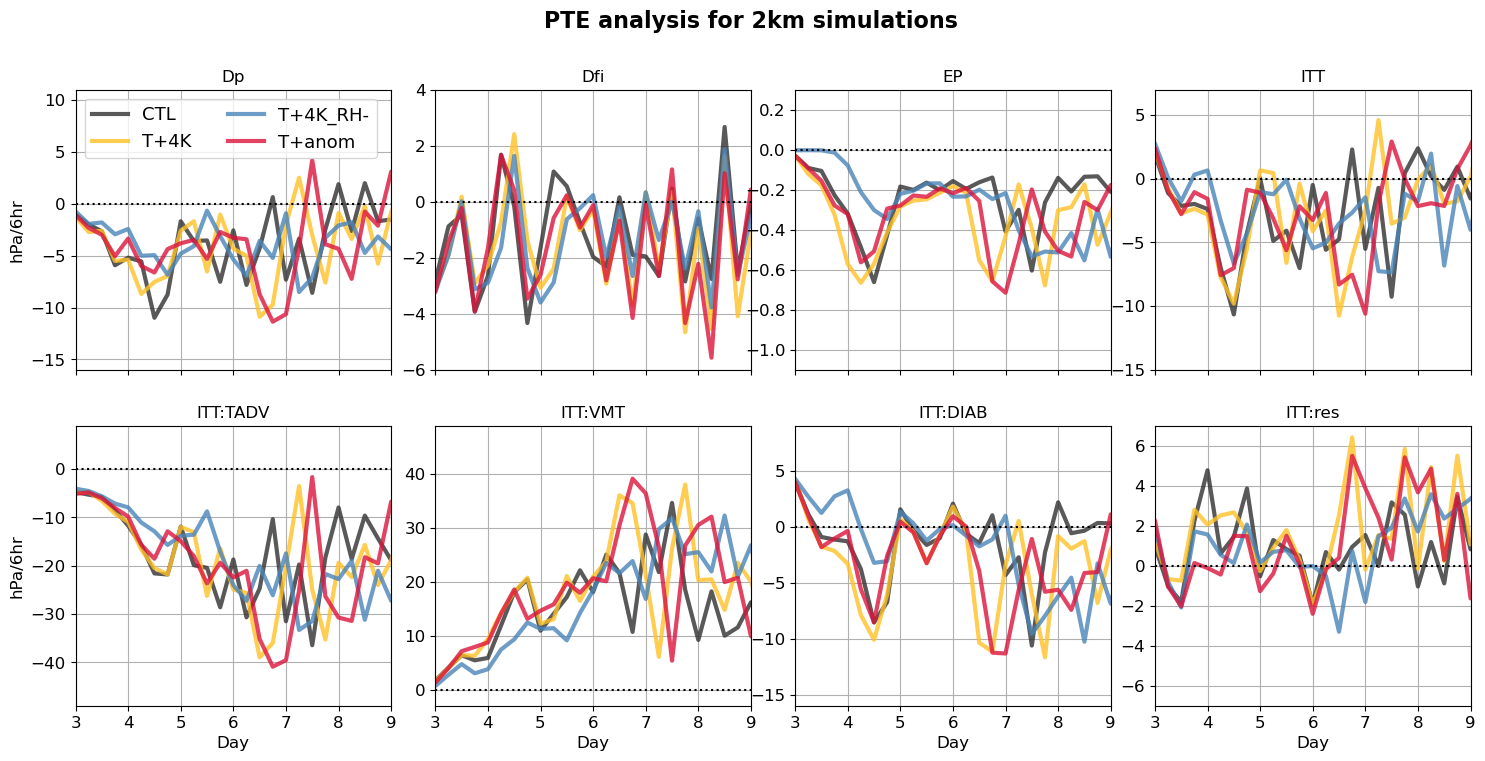

In [10]:
# For 2 km results

exp=exp2
res='2km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax[0,0].plot(dur[exp[i]], dp[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[0,1].plot(dur[exp[i]], dfi[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[0,2].plot(dur[exp[i]], ep[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[0,3].plot(dur[exp[i]], itt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,0].plot(dur[exp[i]], tadv[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,1].plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,2].plot(dur[exp[i]], diab[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    
ax[0,0].set_title('Dp')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res')

ax[0,0].set_ylim((-16, 11))
ax[0,1].set_ylim((-6, 4))
ax[0,2].set_ylim((-1.1, 0.3))
ax[0,3].set_ylim((-15, 7))
ax[1,0].set_ylim(-49, 9)
ax[1,1].set_ylim(-3, 49)
ax[1,2].set_ylim(-16, 9)
ax[1,3].set_ylim(-7, 7)

ax[1,0].set_xlabel('Day', fontsize=12)
ax[1,1].set_xlabel('Day', fontsize=12)
ax[1,2].set_xlabel('Day', fontsize=12)
ax[1,3].set_xlabel('Day', fontsize=12)

ax[0,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0,0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k')
ax[0,1].axhline(y=0,linestyle=':', color='k')
ax[0,2].axhline(y=0,linestyle=':', color='k')
ax[0,3].axhline(y=0,linestyle=':', color='k')
ax[1,0].axhline(y=0,linestyle=':', color='k')
ax[1,1].axhline(y=0,linestyle=':', color='k')
ax[1,2].axhline(y=0,linestyle=':', color='k')
ax[1,3].axhline(y=0,linestyle=':', color='k')
ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.14)
fig.suptitle('PTE analysis for '+res+' simulations',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_Sim1234_'+res+'_Allterms_in_onefig.png',
#               bbox_inches='tight',dpi=100)

plt.show()



# To calculate the time-integrated magnitudes of each term (for the paper)

In [11]:
accdp   = {}
accdfi  = {}
accep   = {}
accitt  = {}
accdiab = {}
accdiablh = {}
accdiabpc = {}
acctadv = {}
accvmt  = {}
accsta  = {}
accomg  = {}
for res in ['80km', '2km']: 
    if res == '80km':
        exp = exp80
    else:
        exp = exp2
    for i in range(1,7):
        accdp[exp[i]]    = dp[exp[i]].cumsum()
        accdfi[exp[i]]   = dfi[exp[i]].cumsum()
        accep[exp[i]]    = ep[exp[i]].cumsum()
        accitt[exp[i]]   = itt[exp[i]].cumsum()
        accdiab[exp[i]]  = diab[exp[i]].cumsum()
        accdiablh[exp[i]]= diablh[exp[i]].cumsum()
        accdiabpc[exp[i]]= diabpc[exp[i]].cumsum()
        acctadv[exp[i]]  = tadv[exp[i]].cumsum()
        accvmt[exp[i]]   = vmt[exp[i]].cumsum()
        accomg[exp[i]]   = omg[exp[i]].cumsum()
        accsta[exp[i]]   = sta[exp[i]].cumsum()
accdp[exp80[1]]   
accdp[exp80[1]]   

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7      -1.268031
8      -2.904587
9      -4.844169
10     -7.719298
11    -12.087329
12    -18.106607
13    -26.401637
14    -37.620743
15    -45.566891
16    -53.038882
17    -60.939539
18    -63.176591
19    -70.771476
20    -74.661188
21    -76.852071
22    -82.465698
23    -92.229404
24    -98.590539
25   -102.867089
26   -105.306979
27   -105.636148
28   -106.823229
29   -109.407653
30   -111.896181
31   -112.198890
32   -112.283634
33   -111.574035
34   -109.304613
35   -110.069699
36   -108.673562
Name: dp, dtype: float64

accdiab 0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
5           NaN
6           NaN
7      2.752237
8      6.762162
9      8.205979
10     6.519042
11     5.672391
12     3.678724
13    -3.560843
14   -14.346055
15   -21.048725
16   -22.552771
17   -24.083884
18   -25.759297
19   -26.791936
20   -25.309869
21   -24.649880
22   -25.897288
23   -29.133601
24   -30.521832
25   -33.436903
26   -35.552700
27   -35.993836
28   -33.960708
29   -34.299247
30   -35.586760
31   -34.939909
32   -32.801162
33   -31.494884
34   -30.959893
35   -31.546640
36   -29.290858
Name: diab, dtype: float64
acctadv 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7      -2.245961
8      -6.382772
9     -12.051140
10    -19.303979
11    -28.490009
12    -40.411299
13    -57.944394
14    -79.928373
15   -101.348978
16   -125.291799
17   -150.953620
18   -168.374153
19   -196.549325
20   -217.918780
21   -23

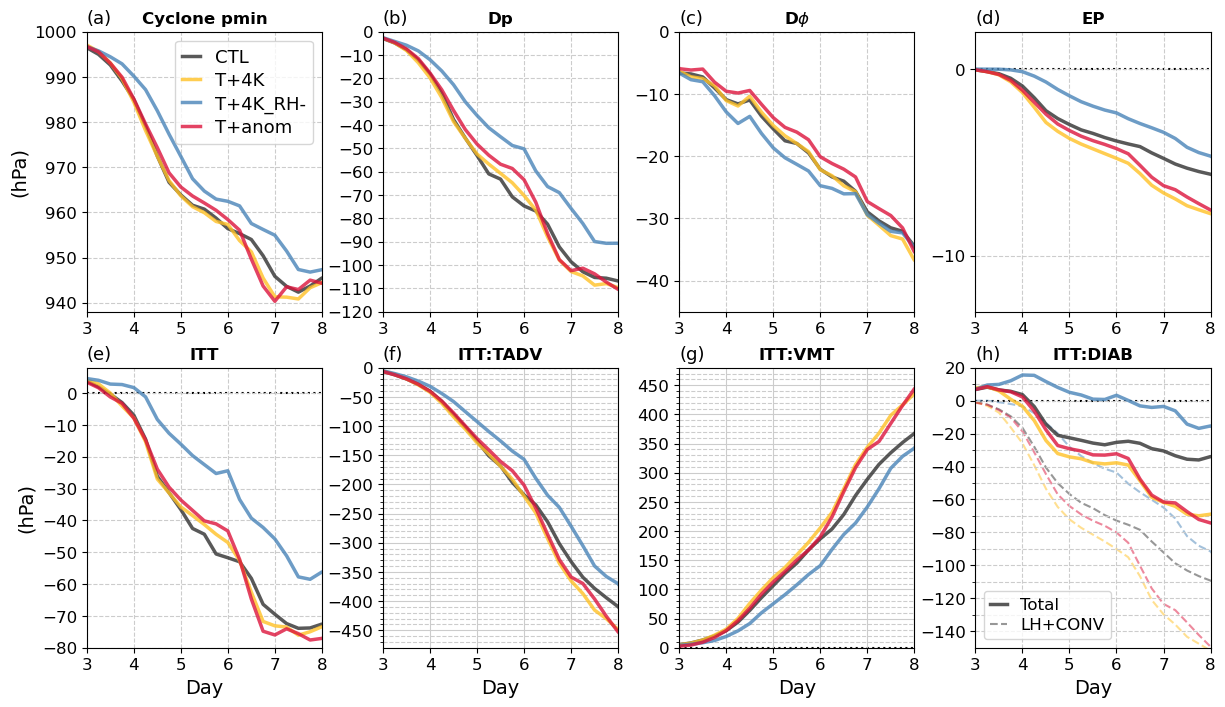

In [12]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# For 80 km results

exp=exp80
res='80km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(14.5,8)) 
ax0 = plt.subplot(2,4,1) 
ax1 = plt.subplot(2,4,2)    
ax2 = plt.subplot(2,4,3)    
ax3 = plt.subplot(2,4,4)    
ax4 = plt.subplot(2,4,5)    
ax5 = plt.subplot(2,4,6)    
ax6 = plt.subplot(2,4,7)   
ax7 = plt.subplot(2,4,8)    
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax0.plot(dur[exp[i]], pmin[exp[i]], color=colors[i],
               linewidth=2.5, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accdp[exp[i]], color=colors[i],
               linewidth=2.5, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accdfi[exp[i]], color=colors[i],
               linewidth=2.5, label=expname[i], alpha=0.8)
    ax3.plot(dur[exp[i]], accep[exp[i]], color=colors[i],
               linewidth=2.5, label=expname[i], alpha=0.8)
    ax4.plot(dur[exp[i]], accitt[exp[i]], color=colors[i],
               linewidth=2.5, label=expname[i], alpha=0.8)
    ax5.plot(dur[exp[i]], acctadv[exp[i]], color=colors[i],
               linewidth=2.5, label=expname[i], alpha=0.8)
    ax6.plot(dur[exp[i]], accvmt[exp[i]], color=colors[i],
               linewidth=2.5, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiab[exp[i]], color=colors[i],
               linewidth=2.5, label='Total', alpha=0.8, zorder=2)
    ax7.plot(dur[exp[i]], accdiablh[exp[i]]+accdiabpc[exp[i]], color=colors[i],
               linewidth=1.5, linestyle='dashed',label='LH+CONV',alpha=0.5, zorder=1)
    
    #if i ==1:
    #    print (accvmt[exp[i]])
    if i == 1:
        ax7.legend(fontsize=12, loc='lower left',handlelength=1.0,labelspacing=0.3)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.8)
    
#ax1b= ax1.twinx()

print('accdiab',accdiab[exp[1]])
print('acctadv',acctadv[exp[1]])
print('accvmt',accvmt[exp[1]])
print('pmin',pmin[exp[4]]-pmin[exp[1]])
print('accdp',accdp[exp[4]]-accdp[exp[1]])
print('accitt',accitt[exp[4]]-accitt[exp[1]])
print('acctadv',acctadv[exp[4]]-acctadv[exp[1]])
print('accvmt',accvmt[exp[4]]-accvmt[exp[1]])
print('accdiab',accdiab[exp[4]]-accdiab[exp[1]])

ax0.set_title('Cyclone pmin', weight='bold')
ax1.set_title('Dp', weight='bold')
ax2.set_title('D'r'$\phi$', weight='bold')
ax3.set_title('EP', weight='bold')
ax4.set_title('ITT', weight='bold')
ax5.set_title('ITT:TADV', weight='bold')
ax6.set_title('ITT:VMT', weight='bold')
ax7.set_title('ITT:DIAB', weight='bold')
#ax[1,3].set_title('ITT:res')

ax0.set_xlim((3, 8))
ax1.set_xlim((3, 8))
ax2.set_xlim((3, 8))
ax3.set_xlim((3, 8))
ax4.set_xlim((3, 8))
ax5.set_xlim((3, 8))
ax6.set_xlim((3, 8))
ax7.set_xlim((3, 8))


ax0.set_ylim((938, 1000))
ax1.set_ylim((-120, 0)) #130
#ax2.set_ylim((-120,  0))
#ax3.set_ylim((-120,  0))
#ax4.set_ylim(-120, 0)
ax2.set_ylim((-45,  0))
ax3.set_ylim((-13,  2))
ax4.set_ylim(-80, 8)
ax5.set_ylim(-480, 0)
ax6.set_ylim(0, 480)
ax7.set_ylim(-150, 20)

#ax1.set_ylim((-26, 0))

ax4.set_xlabel('Day', fontsize=14)
ax5.set_xlabel('Day', fontsize=14)
ax6.set_xlabel('Day', fontsize=14)
ax7.set_xlabel('Day', fontsize=14)
#ax[1,3].set_xlabel('Day', fontsize=12)

ax0.set_ylabel('(hPa)', fontsize=14)
ax4.set_ylabel('(hPa)', fontsize=14)
#ax4.set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax3.yaxis.grid()
ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.yaxis.grid()
ax5.yaxis.grid()
ax6.yaxis.grid()
ax7.yaxis.grid()
#ax[1,3].yaxis.grid()
ax4.xaxis.grid()
ax5.xaxis.grid()
ax6.xaxis.grid()
ax7.xaxis.grid()

# Change major ticks to show every 20.
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax3.yaxis.set_major_locator(MultipleLocator(10))
ax4.yaxis.set_major_locator(MultipleLocator(10))
ax5.yaxis.set_major_locator(MultipleLocator(50))
ax6.yaxis.set_major_locator(MultipleLocator(50))
ax7.yaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
ax5.yaxis.set_minor_locator(AutoMinorLocator(5))
ax6.yaxis.set_minor_locator(AutoMinorLocator(5))
ax7.yaxis.set_minor_locator(AutoMinorLocator(2))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax0.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax2.grid(which='major', color='#CCCCCC', linestyle='--')
ax3.grid(which='major', color='#CCCCCC', linestyle='--')
ax4.grid(which='major', color='#CCCCCC', linestyle='--')
ax5.grid(which='major', color='#CCCCCC', linestyle='solid')
ax6.grid(which='major', color='#CCCCCC', linestyle='solid')
ax5.grid(which='minor', color='#CCCCCC', linestyle='--')
ax6.grid(which='minor', color='#CCCCCC', linestyle='--')
ax7.grid(which='major', color='#CCCCCC', linestyle='--')
ax7.grid(which='minor', color='#CCCCCC', linestyle='--')
#ax0.grid(which='minor', color='#CCCCCC', linestyle=':')


#ax[1,3].xaxis.grid()
#ax0.axhline(y=0,linestyle=':', color='k')
ax1.axhline(y=0,linestyle=':', color='k',zorder=0)
ax2.axhline(y=0,linestyle=':', color='k',zorder=0)
ax3.axhline(y=0,linestyle=':', color='k',zorder=0)
ax4.axhline(y=0,linestyle=':', color='k',zorder=0)
ax5.axhline(y=0,linestyle=':', color='k',zorder=0)
ax6.axhline(y=0,linestyle=':', color='k',zorder=0)
ax7.axhline(y=0,linestyle=':', color='k',zorder=0)
#ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)
#ax[1].legend(ncol=2, loc='upper left')
ax0.legend(fontsize=13, loc='upper right',handlelength=1.0,labelspacing=0.3)

plt.text(0, 1.08, '(a)', ha='left', va='top', transform=ax0.transAxes, fontsize=13) 
plt.text(0, 1.08, '(b)', ha='left', va='top', transform=ax1.transAxes, fontsize=13) 
plt.text(0, 1.08, '(c)', ha='left', va='top', transform=ax2.transAxes, fontsize=13) 
plt.text(0, 1.08, '(d)', ha='left', va='top', transform=ax3.transAxes, fontsize=13) 
plt.text(0, 1.08, '(e)', ha='left', va='top', transform=ax4.transAxes, fontsize=13) 
plt.text(0, 1.08, '(f)', ha='left', va='top', transform=ax5.transAxes, fontsize=13) 
plt.text(0, 1.08, '(g)', ha='left', va='top', transform=ax6.transAxes, fontsize=13) 
plt.text(0, 1.08, '(h)', ha='left', va='top', transform=ax7.transAxes, fontsize=13) 

#plt.text(-0.2, 1.15, '(a)', ha='center', va='top', transform=ax0.transAxes, fontsize=13) 

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(axis='both', which='major', labelsize=12)
ax7.tick_params(axis='both', which='major', labelsize=12)

ax0.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax1.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax2.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax3.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax4.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax5.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax6.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax7.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])


plt.subplots_adjust(wspace = 0.26, hspace=0.2)
#fig.suptitle('PTE analysis for '+res+' simulations (integrated in time)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('Fig10_cyclonePTEtimeseries_timeaggregated_Sim1234_'+res+'_Allterms_in_onefig.png',
               bbox_inches='tight',dpi=100)

plt.show()



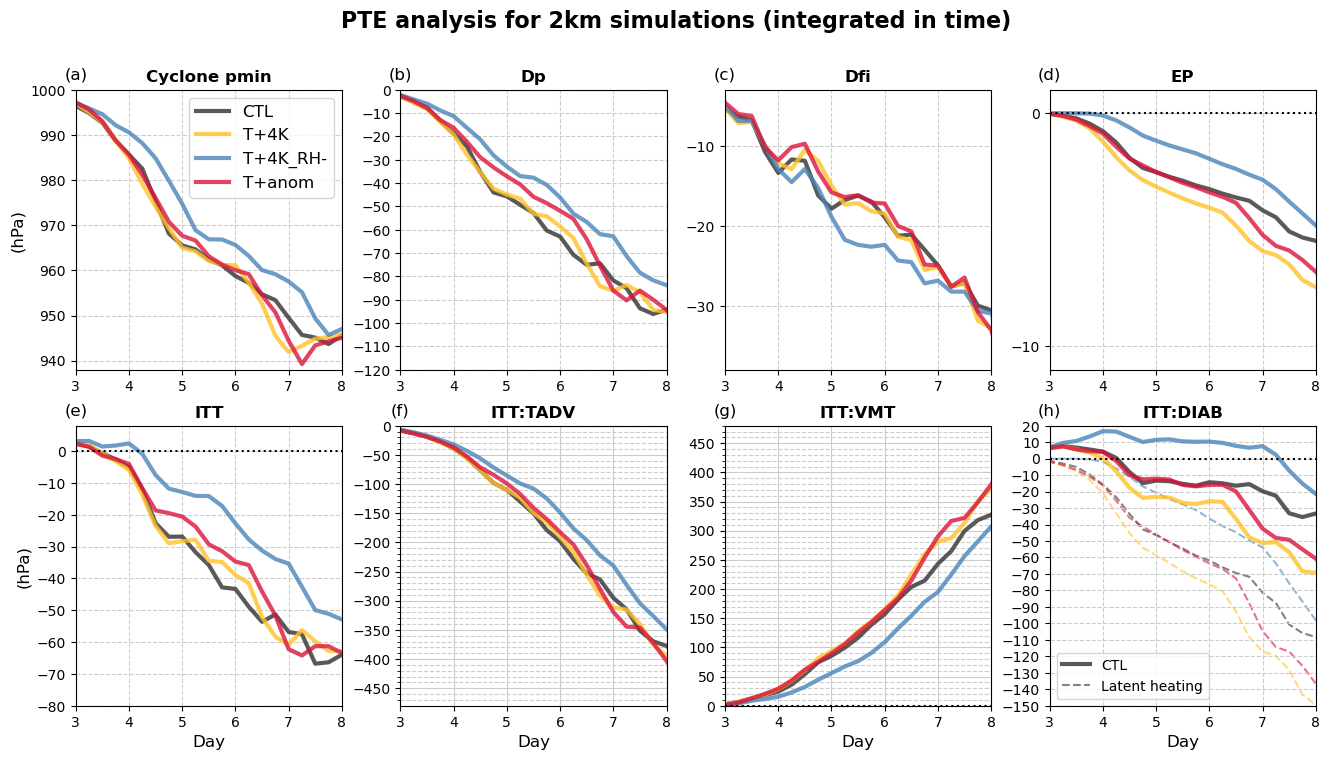

In [13]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# For 2 km results

exp=exp2
res='2km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(16, 8)) 
ax0 = plt.subplot(2,4,1) 
ax1 = plt.subplot(2,4,2)    
ax2 = plt.subplot(2,4,3)    
ax3 = plt.subplot(2,4,4)    
ax4 = plt.subplot(2,4,5)    
ax5 = plt.subplot(2,4,6)    
ax6 = plt.subplot(2,4,7)   
ax7 = plt.subplot(2,4,8)    
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax0.plot(dur[exp[i]], pmin[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accdp[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accdfi[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax3.plot(dur[exp[i]], accep[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax4.plot(dur[exp[i]], accitt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax5.plot(dur[exp[i]], acctadv[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax6.plot(dur[exp[i]], accvmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiab[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiablh[exp[i]], color=colors[i],
               linewidth=1.5, linestyle='dashed',label='Latent heating',alpha=0.6, zorder=1)
    if i == 1:
        ax7.legend(fontsize=10, loc='lower left')
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.8)
    
ax0.set_title('Cyclone pmin', weight='bold')
ax1.set_title('Dp', weight='bold')
ax2.set_title('Dfi', weight='bold')
ax3.set_title('EP', weight='bold')
ax4.set_title('ITT', weight='bold')
ax5.set_title('ITT:TADV', weight='bold')
ax6.set_title('ITT:VMT', weight='bold')
ax7.set_title('ITT:DIAB', weight='bold')
#ax[1,3].set_title('ITT:res')

ax0.set_xlim((3, 8))
ax1.set_xlim((3, 8))
ax2.set_xlim((3, 8))
ax3.set_xlim((3, 8))
ax4.set_xlim((3, 8))
ax5.set_xlim((3, 8))
ax6.set_xlim((3, 8))
ax7.set_xlim((3, 8))

ax0.set_ylim((938, 1000))
ax1.set_ylim((-120, 0))
#ax2.set_ylim((-120,  0))
#ax3.set_ylim((-120,  0))
#ax4.set_ylim(-120, 0)
ax2.set_ylim((-38,  -3))
ax3.set_ylim((-11,  1))
ax4.set_ylim(-80, 8)
ax5.set_ylim(-480, 0)
ax6.set_ylim(0, 480)
ax7.set_ylim(-150, 20)


ax4.set_xlabel('Day', fontsize=12)
ax5.set_xlabel('Day', fontsize=12)
ax6.set_xlabel('Day', fontsize=12)
ax7.set_xlabel('Day', fontsize=12)
#ax[1,3].set_xlabel('Day', fontsize=12)

ax0.set_ylabel('(hPa)', fontsize=12)
ax4.set_ylabel('(hPa)', fontsize=12)
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax3.yaxis.grid()
ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.yaxis.grid()
ax5.yaxis.grid()
ax6.yaxis.grid()
ax7.yaxis.grid()
#ax[1,3].yaxis.grid()
ax4.xaxis.grid()
ax5.xaxis.grid()
ax6.xaxis.grid()
ax7.xaxis.grid()

# Change major ticks to show every 20.
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax3.yaxis.set_major_locator(MultipleLocator(10))
ax4.yaxis.set_major_locator(MultipleLocator(10))
ax5.yaxis.set_major_locator(MultipleLocator(50))
ax6.yaxis.set_major_locator(MultipleLocator(50))
ax7.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 5. (20/4 = 5)
ax5.yaxis.set_minor_locator(AutoMinorLocator(5))
ax6.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax0.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax2.grid(which='major', color='#CCCCCC', linestyle='--')
ax3.grid(which='major', color='#CCCCCC', linestyle='--')
ax4.grid(which='major', color='#CCCCCC', linestyle='--')
ax5.grid(which='major', color='#CCCCCC', linestyle='solid')
ax6.grid(which='major', color='#CCCCCC', linestyle='solid')
ax5.grid(which='minor', color='#CCCCCC', linestyle='--')
ax6.grid(which='minor', color='#CCCCCC', linestyle='--')
ax7.grid(which='major', color='#CCCCCC', linestyle='--')
#ax0.grid(which='minor', color='#CCCCCC', linestyle=':')


#ax[1,3].xaxis.grid()
#ax0.axhline(y=0,linestyle=':', color='k')
ax1.axhline(y=0,linestyle=':', color='k')
ax2.axhline(y=0,linestyle=':', color='k')
ax3.axhline(y=0,linestyle=':', color='k')
ax4.axhline(y=0,linestyle=':', color='k')
ax5.axhline(y=0,linestyle=':', color='k')
ax6.axhline(y=0,linestyle=':', color='k')
ax7.axhline(y=0,linestyle=':', color='k')
#ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)
#ax[1].legend(ncol=2, loc='upper left')
ax0.legend(fontsize=12, loc='upper right')

plt.text(0, 1.08, '(a)', ha='center', va='top', transform=ax0.transAxes, fontsize=12) 
plt.text(0, 1.08, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=12) 
plt.text(0, 1.08, '(c)', ha='center', va='top', transform=ax2.transAxes, fontsize=12) 
plt.text(0, 1.08, '(d)', ha='center', va='top', transform=ax3.transAxes, fontsize=12) 
plt.text(0, 1.08, '(e)', ha='center', va='top', transform=ax4.transAxes, fontsize=12) 
plt.text(0, 1.08, '(f)', ha='center', va='top', transform=ax5.transAxes, fontsize=12) 
plt.text(0, 1.08, '(g)', ha='center', va='top', transform=ax6.transAxes, fontsize=12) 
plt.text(0, 1.08, '(h)', ha='center', va='top', transform=ax7.transAxes, fontsize=12) 


#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
#ax0.tick_params(axis='both', which='major', labelsize=12)
#ax1.tick_params(axis='both', which='major', labelsize=12)
#ax2.tick_params(axis='both', which='major', labelsize=12)
#ax3.tick_params(axis='both', which='major', labelsize=12)
#ax4.tick_params(axis='both', which='major', labelsize=12)
#ax5.tick_params(axis='both', which='major', labelsize=12)
#ax6.tick_params(axis='both', which='major', labelsize=12)
#ax7.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace = 0.22, hspace=0.2)
fig.suptitle('PTE analysis for '+res+' simulations (integrated in time)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_timeaggregated_Sim1234_'+res+'_Allterms_in_onefig.png',
#               bbox_inches='tight',dpi=100)

plt.show()



0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6     0.000000
7    -0.278175
8    -0.345788
9    -0.302641
10   -0.888738
11   -0.251361
12   -0.934693
13   -0.216772
14    2.253171
15    1.742319
16    3.000414
17    5.678669
18    4.198040
19    9.457795
20    8.418605
21    0.777930
22   -6.486085
23   -8.462446
24   -6.508859
25   -1.639146
26   -1.677408
27   -3.784214
28   -4.490886
29   -1.515006
30    1.709781
31    1.999779
32    1.874572
33    1.894424
34    3.384399
35    7.111102
36    8.410878
Name: itt, dtype: float64


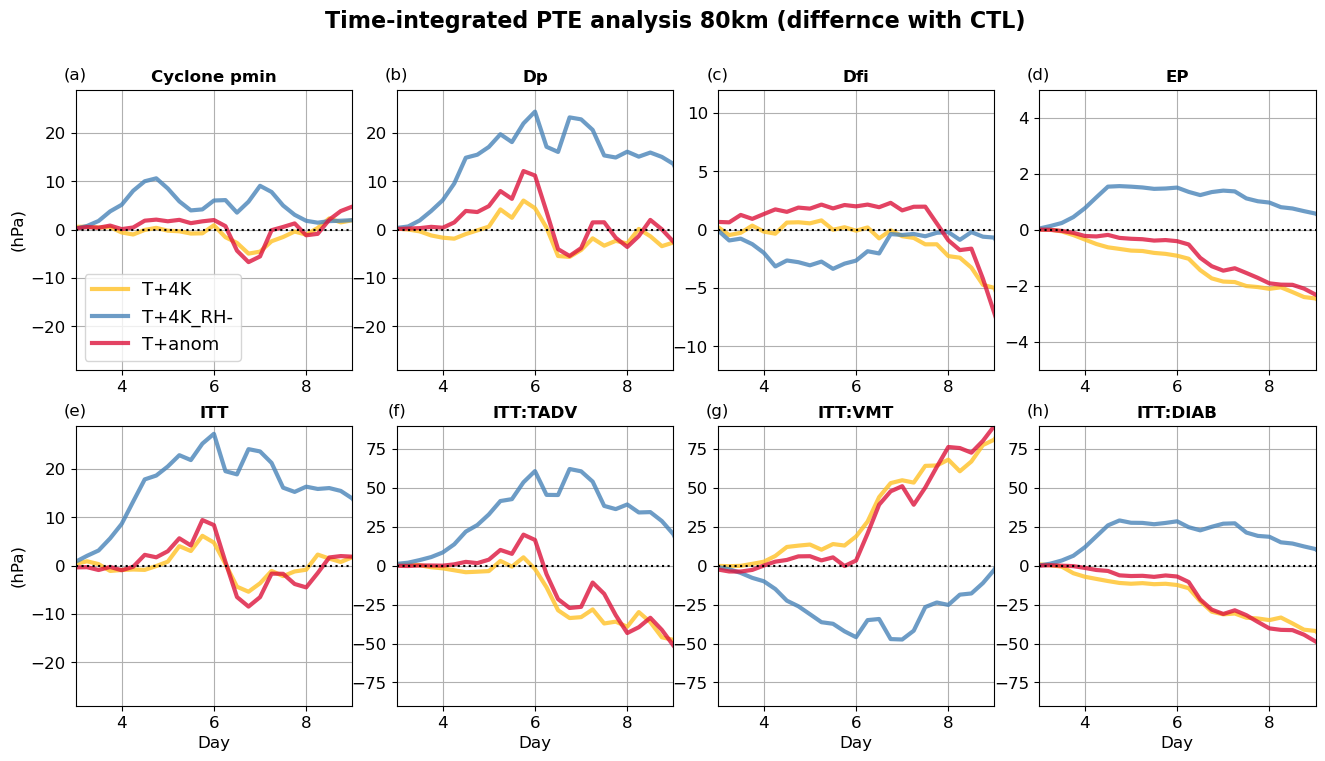

In [14]:
# For 80 km results

exp=exp80
res='80km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(16, 8)) 
ax0 = plt.subplot(2,4,1) 
ax1 = plt.subplot(2,4,2)    
ax2 = plt.subplot(2,4,3)    
ax3 = plt.subplot(2,4,4)    
ax4 = plt.subplot(2,4,5)    
ax5 = plt.subplot(2,4,6)    
ax6 = plt.subplot(2,4,7)   
ax7 = plt.subplot(2,4,8)    
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(2,5): # loop over simulations
    ax0.plot(dur[exp[i]], pmin[exp[i]]- pmin[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accdp[exp[i]]-accdp[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accdfi[exp[i]]-accdfi[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax3.plot(dur[exp[i]], accep[exp[i]]-accep[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax4.plot(dur[exp[i]], accitt[exp[i]]-accitt[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    if i == 4:
        print (accitt[exp[i]]-accitt[exp[1]])
    ax5.plot(dur[exp[i]], acctadv[exp[i]]-acctadv[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax6.plot(dur[exp[i]], accvmt[exp[i]]-accvmt[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiab[exp[i]]-accdiab[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.8)
    
ax0.set_title('Cyclone pmin',weight='bold')
ax1.set_title('Dp',weight='bold')
ax2.set_title('Dfi',weight='bold')
ax3.set_title('EP',weight='bold')
ax4.set_title('ITT',weight='bold')
ax5.set_title('ITT:TADV',weight='bold')
ax6.set_title('ITT:VMT',weight='bold')
ax7.set_title('ITT:DIAB',weight='bold')


ax0.set_xlim((3, 9))
ax1.set_xlim((3, 9))
ax2.set_xlim((3, 9))
ax3.set_xlim((3, 9))
ax4.set_xlim((3, 9))
ax5.set_xlim((3, 9))
ax6.set_xlim((3, 9))
ax7.set_xlim((3, 9))

ax0.set_ylim((-29, 29))
ax1.set_ylim((-29, 29))
ax2.set_ylim((-12, 12))
ax3.set_ylim((-5, 5))
ax4.set_ylim((-29, 29))
ax5.set_ylim((-90, 90))
ax6.set_ylim((-90, 90))
ax7.set_ylim((-90, 90))

ax4.set_xlabel('Day', fontsize=12)
ax5.set_xlabel('Day', fontsize=12)
ax6.set_xlabel('Day', fontsize=12)
ax7.set_xlabel('Day', fontsize=12)
#ax[1,3].set_xlabel('Day', fontsize=12)

ax0.set_ylabel('(hPa)', fontsize=12)
ax4.set_ylabel('(hPa)', fontsize=12)
#ax4.set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax3.yaxis.grid()
ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.yaxis.grid()
ax5.yaxis.grid()
ax6.yaxis.grid()
ax7.yaxis.grid()
#ax[1,3].yaxis.grid()
ax4.xaxis.grid()
ax5.xaxis.grid()
ax6.xaxis.grid()
ax7.xaxis.grid()
#ax[1,3].xaxis.grid()
ax0.axhline(y=0,linestyle=':', color='k')
ax1.axhline(y=0,linestyle=':', color='k')
ax2.axhline(y=0,linestyle=':', color='k')
ax3.axhline(y=0,linestyle=':', color='k')
ax4.axhline(y=0,linestyle=':', color='k')
ax5.axhline(y=0,linestyle=':', color='k')
ax6.axhline(y=0,linestyle=':', color='k')
ax7.axhline(y=0,linestyle=':', color='k')
ax0.legend(fontsize=13, loc='lower left') #bbox_to_anchor=(1.2,0.8))

plt.text(0, 1.08, '(a)', ha='center', va='top', transform=ax0.transAxes, fontsize=12) 
plt.text(0, 1.08, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=12) 
plt.text(0, 1.08, '(c)', ha='center', va='top', transform=ax2.transAxes, fontsize=12) 
plt.text(0, 1.08, '(d)', ha='center', va='top', transform=ax3.transAxes, fontsize=12) 
plt.text(0, 1.08, '(e)', ha='center', va='top', transform=ax4.transAxes, fontsize=12) 
plt.text(0, 1.08, '(f)', ha='center', va='top', transform=ax5.transAxes, fontsize=12) 
plt.text(0, 1.08, '(g)', ha='center', va='top', transform=ax6.transAxes, fontsize=12) 
plt.text(0, 1.08, '(h)', ha='center', va='top', transform=ax7.transAxes, fontsize=12) 

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(axis='both', which='major', labelsize=12)
ax7.tick_params(axis='both', which='major', labelsize=12)
#ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.16, hspace=0.2)
fig.suptitle('Time-integrated PTE analysis '+res+' (differnce with CTL)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_diffwithCTL_timeaggregated_Sim1234_'+res+'_Allterms.png',
#               bbox_inches='tight',dpi=100)

plt.show()



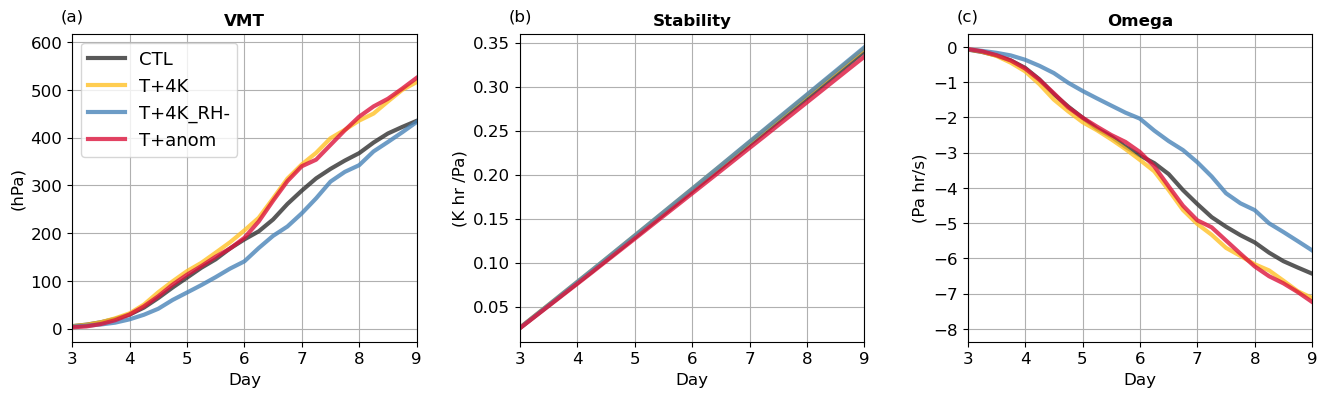

In [15]:
# For 80 km results

exp=exp80
res='80km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(16, 4)) 
ax0 = plt.subplot(1,3,1) 
ax1 = plt.subplot(1,3,2)    
ax2 = plt.subplot(1,3,3)    
 
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax0.plot(dur[exp[i]], accvmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accsta[exp[i]]*-1, color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accomg[exp[i]]*-1, color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    
    
ax0.set_title('VMT',weight='bold')
ax1.set_title('Stability',weight='bold')
ax2.set_title('Omega',weight='bold')


ax0.set_xlim((3, 9))
ax1.set_xlim((3, 9))
ax2.set_xlim((3, 9))


#ax0.set_ylim((-90, 90))
ax1.set_ylim((0.01, 0.36))
#ax2.set_ylim((-12, 12))
 
ax0.set_xlabel('Day', fontsize=12)
ax1.set_xlabel('Day', fontsize=12)
ax2.set_xlabel('Day', fontsize=12)


ax0.set_ylabel('(hPa)', fontsize=12)
ax1.set_ylabel('(K hr /Pa)', fontsize=12)
ax2.set_ylabel('(Pa hr/s)', fontsize=12)

#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()

ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()

#ax[1,3].xaxis.grid()
#ax0.axhline(y=0,linestyle=':', color='k')
#ax1.axhline(y=0,linestyle=':', color='k')
#ax2.axhline(y=0,linestyle=':', color='k')

ax0.legend(fontsize=13, loc='upper left') #bbox_to_anchor=(1.2,0.8))

plt.text(0, 1.08, '(a)', ha='center', va='top', transform=ax0.transAxes, fontsize=12) 
plt.text(0, 1.08, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=12) 
plt.text(0, 1.08, '(c)', ha='center', va='top', transform=ax2.transAxes, fontsize=12) 


#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

#ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.3, hspace=0.2)
#fig.suptitle('Time-integrated PTE analysis '+res+' (differnce with CTL)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_diffwithCTL_timeaggregated_Sim1234_'+res+'_VMT.png',
#               bbox_inches='tight',dpi=100)

plt.show()



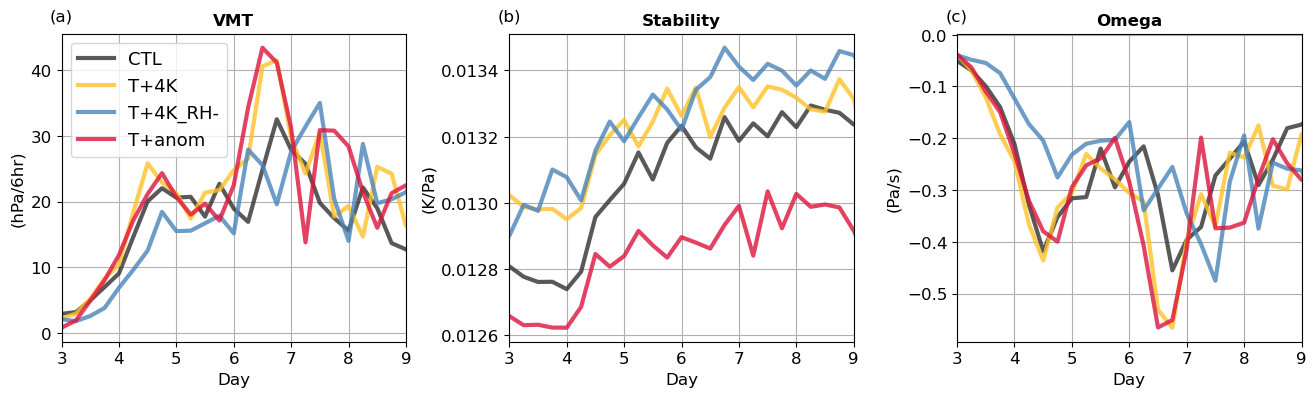

In [16]:
# For 80 km results

exp=exp80
res='80km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(16, 4)) 
ax0 = plt.subplot(1,3,1) 
ax1 = plt.subplot(1,3,2)    
ax2 = plt.subplot(1,3,3)    
 
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax0.plot(dur[exp[i]], vmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], sta[exp[i]]*-1, color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], omg[exp[i]]*-1, color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    
    
ax0.set_title('VMT',weight='bold')
ax1.set_title('Stability',weight='bold')
ax2.set_title('Omega',weight='bold')


ax0.set_xlim((3, 9))
ax1.set_xlim((3, 9))
ax2.set_xlim((3, 9))


#ax0.set_ylim((-90, 90))
#ax1.set_ylim((-29, 29))
#ax2.set_ylim((-12, 12))
 
ax0.set_xlabel('Day', fontsize=12)
ax1.set_xlabel('Day', fontsize=12)
ax2.set_xlabel('Day', fontsize=12)


ax0.set_ylabel('(hPa/6hr)', fontsize=12)
ax1.set_ylabel('(K/Pa)', fontsize=12)
ax2.set_ylabel('(Pa/s)', fontsize=12)

#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()

ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()

#ax[1,3].xaxis.grid()
#ax0.axhline(y=0,linestyle=':', color='k')
#ax1.axhline(y=0,linestyle=':', color='k')
#ax2.axhline(y=0,linestyle=':', color='k')

ax0.legend(fontsize=13, loc='upper left') #bbox_to_anchor=(1.2,0.8))

plt.text(0, 1.08, '(a)', ha='center', va='top', transform=ax0.transAxes, fontsize=12) 
plt.text(0, 1.08, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=12) 
plt.text(0, 1.08, '(c)', ha='center', va='top', transform=ax2.transAxes, fontsize=12) 


#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

#ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.3, hspace=0.2)
#fig.suptitle('PTE analysis '+res+'',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_diffwithCTL_Sim1234_'+res+'_VMT.png',
#               bbox_inches='tight',dpi=100)

plt.show()



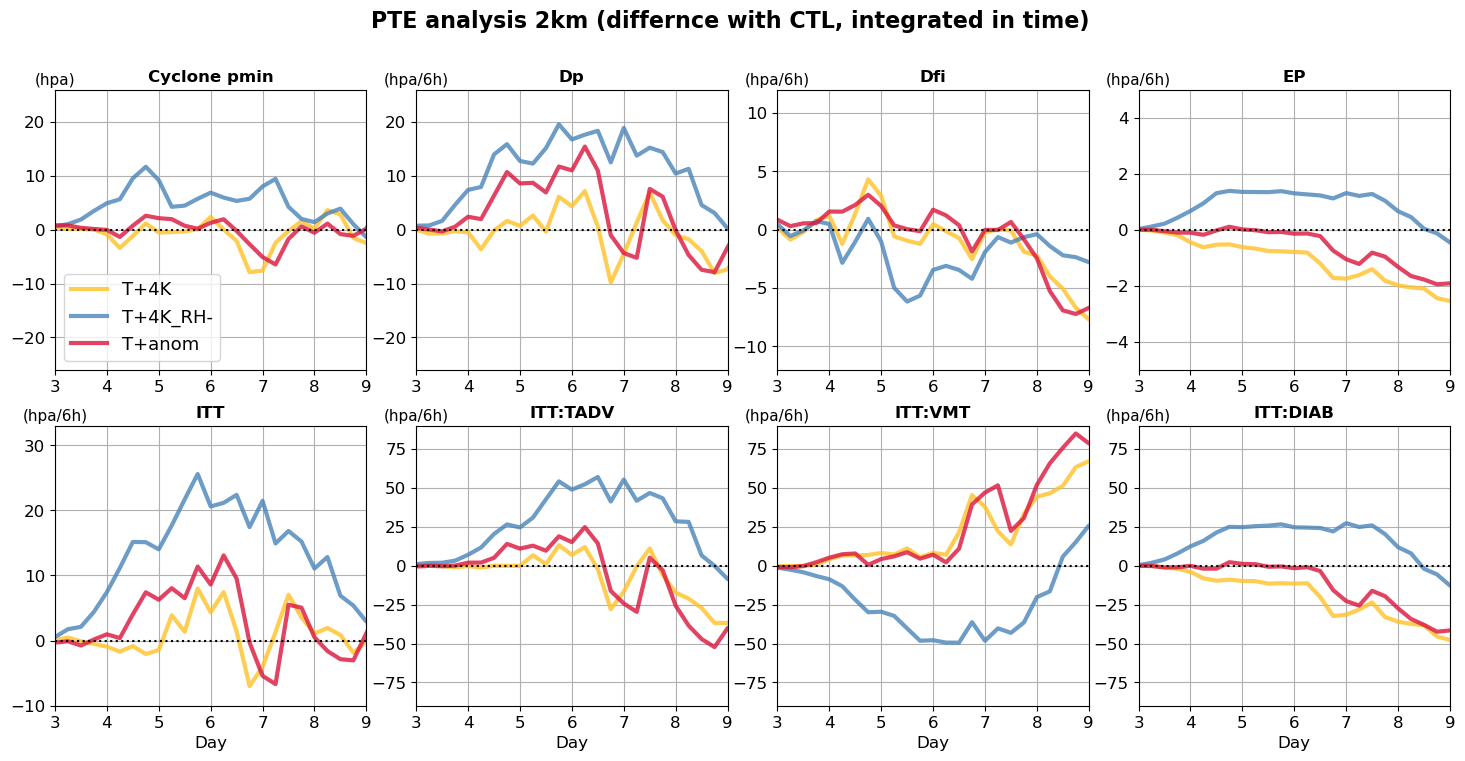

In [17]:
# For 2 km results

exp=exp2
res='2km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(18, 8)) 
ax0 = plt.subplot(2,4,1) 
ax1 = plt.subplot(2,4,2)    
ax2 = plt.subplot(2,4,3)    
ax3 = plt.subplot(2,4,4)    
ax4 = plt.subplot(2,4,5)    
ax5 = plt.subplot(2,4,6)    
ax6 = plt.subplot(2,4,7)   
ax7 = plt.subplot(2,4,8)    
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(2,5): # loop over simulations
    ax0.plot(dur[exp[i]], pmin[exp[i]]- pmin[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accdp[exp[i]]-accdp[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accdfi[exp[i]]-accdfi[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax3.plot(dur[exp[i]], accep[exp[i]]-accep[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax4.plot(dur[exp[i]], accitt[exp[i]]-accitt[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax5.plot(dur[exp[i]], acctadv[exp[i]]-acctadv[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax6.plot(dur[exp[i]], accvmt[exp[i]]-accvmt[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiab[exp[i]]-accdiab[exp[1]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.8)
    
ax0.set_title('Cyclone pmin',weight='bold')
ax1.set_title('Dp',weight='bold')
ax2.set_title('Dfi',weight='bold')
ax3.set_title('EP',weight='bold')
ax4.set_title('ITT',weight='bold')
ax5.set_title('ITT:TADV',weight='bold')
ax6.set_title('ITT:VMT',weight='bold')
ax7.set_title('ITT:DIAB',weight='bold')


ax0.set_xlim((3, 9))
ax1.set_xlim((3, 9))
ax2.set_xlim((3, 9))
ax3.set_xlim((3, 9))
ax4.set_xlim((3, 9))
ax5.set_xlim((3, 9))
ax6.set_xlim((3, 9))
ax7.set_xlim((3, 9))

ax0.set_ylim((-26, 26))
ax1.set_ylim((-26, 26))
ax2.set_ylim((-12, 12))
ax3.set_ylim((-5, 5))
ax4.set_ylim((-10, 33))
ax5.set_ylim((-90, 90))
ax6.set_ylim((-90, 90))
ax7.set_ylim((-90, 90))

ax4.set_xlabel('Day', fontsize=12)
ax5.set_xlabel('Day', fontsize=12)
ax6.set_xlabel('Day', fontsize=12)
ax7.set_xlabel('Day', fontsize=12)
#ax[1,3].set_xlabel('Day', fontsize=12)

#ax0.set_ylabel('hPa', fontsize=12)
#ax4.set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax3.yaxis.grid()
ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.yaxis.grid()
ax5.yaxis.grid()
ax6.yaxis.grid()
ax7.yaxis.grid()
#ax[1,3].yaxis.grid()
ax4.xaxis.grid()
ax5.xaxis.grid()
ax6.xaxis.grid()
ax7.xaxis.grid()
#ax[1,3].xaxis.grid()
ax0.axhline(y=0,linestyle=':', color='k')
ax1.axhline(y=0,linestyle=':', color='k')
ax2.axhline(y=0,linestyle=':', color='k')
ax3.axhline(y=0,linestyle=':', color='k')
ax4.axhline(y=0,linestyle=':', color='k')
ax5.axhline(y=0,linestyle=':', color='k')
ax6.axhline(y=0,linestyle=':', color='k')
ax7.axhline(y=0,linestyle=':', color='k')
ax0.legend(fontsize=13, loc='lower left') #bbox_to_anchor=(1.2,0.8))

plt.text(0, 1.06, '(hpa)', ha='center', va='top', transform=ax0.transAxes, fontsize=11) 
plt.text(0, 1.06, '(hpa/6h)', ha='center', va='top', transform=ax1.transAxes, fontsize=11) 
plt.text(0, 1.06, '(hpa/6h)', ha='center', va='top', transform=ax2.transAxes, fontsize=11) 
plt.text(0, 1.06, '(hpa/6h)', ha='center', va='top', transform=ax3.transAxes, fontsize=11) 
plt.text(0, 1.06, '(hpa/6h)', ha='center', va='top', transform=ax4.transAxes, fontsize=11) 
plt.text(0, 1.06, '(hpa/6h)', ha='center', va='top', transform=ax5.transAxes, fontsize=11) 
plt.text(0, 1.06, '(hpa/6h)', ha='center', va='top', transform=ax6.transAxes, fontsize=11) 
plt.text(0, 1.06, '(hpa/6h)', ha='center', va='top', transform=ax7.transAxes, fontsize=11) 

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(axis='both', which='major', labelsize=12)
ax7.tick_params(axis='both', which='major', labelsize=12)
#ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.16, hspace=0.2)
fig.suptitle('PTE analysis '+res+' (differnce with CTL, integrated in time)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_diffwithCTL_timeaggregated_Sim1234_'+res+'_Allterms.png',
#               bbox_inches='tight',dpi=100)

plt.show()



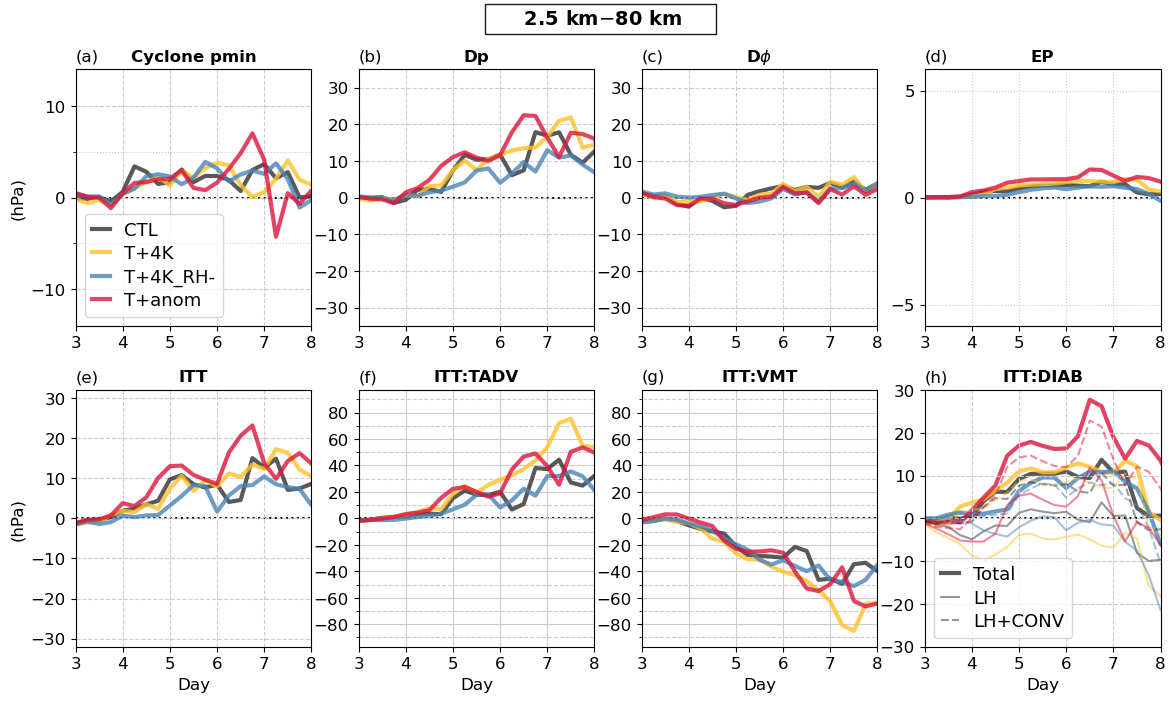

In [18]:
# For resolution sesitivity



# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(14,7.5)) 
ax0 = plt.subplot(2,4,1) 
ax1 = plt.subplot(2,4,2)    
ax2 = plt.subplot(2,4,3)    
ax3 = plt.subplot(2,4,4)    
ax4 = plt.subplot(2,4,5)    
ax5 = plt.subplot(2,4,6)    
ax6 = plt.subplot(2,4,7)   
ax7 = plt.subplot(2,4,8)    
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax0.plot(dur[exp[i]], pmin[exp2[i]]- pmin[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accdp[exp2[i]]-accdp[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accdfi[exp2[i]]-accdfi[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax3.plot(dur[exp[i]], accep[exp2[i]]-accep[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax4.plot(dur[exp[i]], accitt[exp2[i]]-accitt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax5.plot(dur[exp[i]], acctadv[exp2[i]]-acctadv[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax6.plot(dur[exp[i]], accvmt[exp2[i]]-accvmt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiab[exp2[i]]-accdiab[exp80[i]], color=colors[i],
               linewidth=3, label='Total', alpha=0.8, zorder=1)
    ax7.plot(dur[exp[i]], accdiablh[exp2[i]]-accdiablh[exp80[i]], color=colors[i],
               linewidth=1.5, linestyle='solid',label='LH',alpha=0.5, zorder=2)
    ax7.plot(dur[exp[i]], accdiabpc[exp2[i]]+accdiablh[exp2[i]]-accdiabpc[exp80[i]]-accdiablh[exp80[i]], color=colors[i],
              linewidth=1.5, linestyle='dashed',label='LH+CONV',alpha=0.5, zorder=2)

    if i == 1:
        ax7.legend(fontsize=13, loc='lower left',handlelength=1.0,labelspacing=0.3)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.8)
    
ax0.set_title('Cyclone pmin',weight='bold')
ax1.set_title('Dp',weight='bold')
ax2.set_title('D'r'$\phi$',weight='bold')
ax3.set_title('EP',weight='bold')
ax4.set_title('ITT',weight='bold')
ax5.set_title('ITT:TADV',weight='bold')
ax6.set_title('ITT:VMT',weight='bold')
ax7.set_title('ITT:DIAB',weight='bold')


ax0.set_xlim((3, 8))
ax1.set_xlim((3, 8))
ax2.set_xlim((3, 8))
ax3.set_xlim((3, 8))
ax4.set_xlim((3, 8))
ax5.set_xlim((3, 8))
ax6.set_xlim((3, 8))
ax7.set_xlim((3, 8))

ax0.set_ylim((-14, 14))
ax1.set_ylim((-35, 35))
ax2.set_ylim((-35, 35))
ax3.set_ylim((-6, 6))
ax4.set_ylim((-32, 32))
ax5.set_ylim((-97, 97))
ax6.set_ylim((-97, 97))
ax7.set_ylim((-30, 30))


ax4.set_xlabel('Day', fontsize=12)
ax5.set_xlabel('Day', fontsize=12)
ax6.set_xlabel('Day', fontsize=12)
ax7.set_xlabel('Day', fontsize=12)

ax0.set_ylabel('(hPa)', fontsize=12)
ax4.set_ylabel('(hPa)', fontsize=12)
#ax[1,3].set_xlabel('Day', fontsize=12)

#ax0.set_ylabel('hPa', fontsize=12)
#ax4.set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax3.yaxis.grid()
ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.yaxis.grid()
ax5.yaxis.grid()
ax6.yaxis.grid()
ax7.yaxis.grid()
#ax[1,3].yaxis.grid()
ax4.xaxis.grid()
ax5.xaxis.grid()
ax6.xaxis.grid()
ax7.xaxis.grid()

# Change major ticks to show every 20.
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax3.yaxis.set_major_locator(MultipleLocator(5))
ax4.yaxis.set_major_locator(MultipleLocator(10))
ax5.yaxis.set_major_locator(MultipleLocator(20))
ax6.yaxis.set_major_locator(MultipleLocator(20))
ax7.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 5. (20/4 = 5)
ax0.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))


# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax0.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax2.grid(which='major', color='#CCCCCC', linestyle='--')
ax3.grid(which='major', color='#CCCCCC', linestyle=':')
ax4.grid(which='major', color='#CCCCCC', linestyle='--')
ax5.grid(which='major', color='#CCCCCC', linestyle='solid')
ax6.grid(which='major', color='#CCCCCC', linestyle='solid')
ax5.grid(which='minor', color='#CCCCCC', linestyle='--')
ax6.grid(which='minor', color='#CCCCCC', linestyle='--')
ax7.grid(which='major', color='#CCCCCC', linestyle='--')
ax0.grid(which='minor', color='#CCCCCC', linestyle=':')


ax0.axhline(y=0,linestyle=':', color='k', zorder=0)
ax1.axhline(y=0,linestyle=':', color='k', zorder=0)
ax2.axhline(y=0,linestyle=':', color='k', zorder=0)
ax3.axhline(y=0,linestyle=':', color='k', zorder=0)
ax4.axhline(y=0,linestyle=':', color='k', zorder=0)
ax5.axhline(y=0,linestyle=':', color='k', zorder=0)
ax6.axhline(y=0,linestyle=':', color='k', zorder=0)
ax7.axhline(y=0,linestyle=':', color='k', zorder=0)
ax0.legend(fontsize=13, loc='lower left',handlelength=1.0,labelspacing=0.3) #bbox_to_anchor=(1.2,0.8))

plt.text(0, 1.08, '(a)', ha='left', va='top', transform=ax0.transAxes, fontsize=12) 
plt.text(0, 1.08, '(b)', ha='left', va='top', transform=ax1.transAxes, fontsize=12) 
plt.text(0, 1.08, '(c)', ha='left', va='top', transform=ax2.transAxes, fontsize=12) 
plt.text(0, 1.08, '(d)', ha='left', va='top', transform=ax3.transAxes, fontsize=12) 
plt.text(0, 1.08, '(e)', ha='left', va='top', transform=ax4.transAxes, fontsize=12) 
plt.text(0, 1.08, '(f)', ha='left', va='top', transform=ax5.transAxes, fontsize=12) 
plt.text(0, 1.08, '(g)', ha='left', va='top', transform=ax6.transAxes, fontsize=12) 
plt.text(0, 1.08, '(h)', ha='left', va='top', transform=ax7.transAxes, fontsize=12) 

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(axis='both', which='major', labelsize=12)
ax7.tick_params(axis='both', which='major', labelsize=12)

ax0.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax1.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax2.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax3.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax4.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax5.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax6.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax7.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
#ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.22, hspace=0.2)
fig.suptitle('     2.5 km'r'$-$''80 km     ',fontsize=14, 
             bbox=dict(ec='k',
             fc='white',alpha=0.9), y= 0.96,
             weight='bold')
plt.subplots_adjust(wspace = 0.2, hspace=0.25)
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('Fig11_cyclonePTEtimeseries_timeaggregated_Sim1234_'+res+'_Allterms_2km-80km.png',
               bbox_inches='tight',dpi=100)

plt.show()



OK, so we know that the difference in PTE analysis between 2km and 80 km is 
# partially due to the difference in the cyclone center identification...
But can we quantify such an impact? Below we show the results when the cyclone center is uniformly defined (reference: 80km). 

In [19]:
#res='80km'
#####################################################
# Read in PTE track data from file
#####################################################
#Cyclone Track
path_track = '/work/bb1152/Module_A/A6_CyclEx/pp_data/cyclone_PTE_timeseries/'
#path_track = '/work/bb1152/Module_A/A6_CyclEx/b382037_TingChen/Task3/PTE/cyclone_PTE_timeseries/'

for res in ['2km']:
    for i in range(1,7):
        #print(exp80[i])
        exp=exp2n
        ifile    ='PTE_for_'+exp2[i]+'_'+data_dt+'_'+data_res+'_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_ddt_temp_CCfrom80km.csv'
        print(ifile)
        df_track = pd.read_csv(path_track+ifile)
        #ntrack = len(df_track['lat']) 
        dur[exp[i]] = df_track['time']+1
        #lon  = df_track['lon']
        #lat  = df_track['lat'] 
        pmin[exp[i]]      = df_track['p_loc80']
        dp[exp[i]]        = df_track['dp'] 
        dfi[exp[i]]       = df_track['dfi']                      
        ep[exp[i]]        = df_track['ep']    
        itt[exp[i]]       = df_track['itt'] 
        eq1res[exp[i]]    = df_track['eq1res']                     
        tadv[exp[i]]      = df_track['tadv']
        vmt[exp[i]]       = df_track['vmt']
        diab[exp[i]]      = df_track['diab']
        diablh[exp[i]]    = df_track['diablh']
        diabpc[exp[i]]    = df_track['diabpc']
        diablwr[exp[i]]   = df_track['diablwr']
        diabswr[exp[i]]   = df_track['diabswr']
        diabtur[exp[i]]   = df_track['diabtur']
        eq2res[exp[i]]    = df_track['eq2res'] 
        diabptend[exp[i]] = df_track['diabptend'] 

for i in range(1,7):
    accdp[exp2n[i]]    = dp[exp2n[i]].cumsum()
    accdfi[exp2n[i]]   = dfi[exp2n[i]].cumsum()
    accep[exp2n[i]]    = ep[exp2n[i]].cumsum()
    accitt[exp2n[i]]   = itt[exp2n[i]].cumsum()
    accdiab[exp2n[i]]  = diab[exp2n[i]].cumsum()
    accdiablh[exp2n[i]]= diablh[exp2n[i]].cumsum()
    accdiabpc[exp2n[i]]= diabpc[exp2n[i]].cumsum()
    acctadv[exp2n[i]]  = tadv[exp2n[i]].cumsum()
    accvmt[exp2n[i]]   = vmt[exp2n[i]].cumsum()

PTE_for_channel_2km_0001_6hrly_1x1latlon_upper50hPa_box6_ddt_temp_CCfrom80km.csv
PTE_for_channel_2km_0002_6hrly_1x1latlon_upper50hPa_box6_ddt_temp_CCfrom80km.csv
PTE_for_channel_2km_0003_6hrly_1x1latlon_upper50hPa_box6_ddt_temp_CCfrom80km.csv
PTE_for_channel_2km_0004_6hrly_1x1latlon_upper50hPa_box6_ddt_temp_CCfrom80km.csv
PTE_for_channel_2km_0005_6hrly_1x1latlon_upper50hPa_box6_ddt_temp_CCfrom80km.csv
PTE_for_channel_2km_0006_6hrly_1x1latlon_upper50hPa_box6_ddt_temp_CCfrom80km.csv


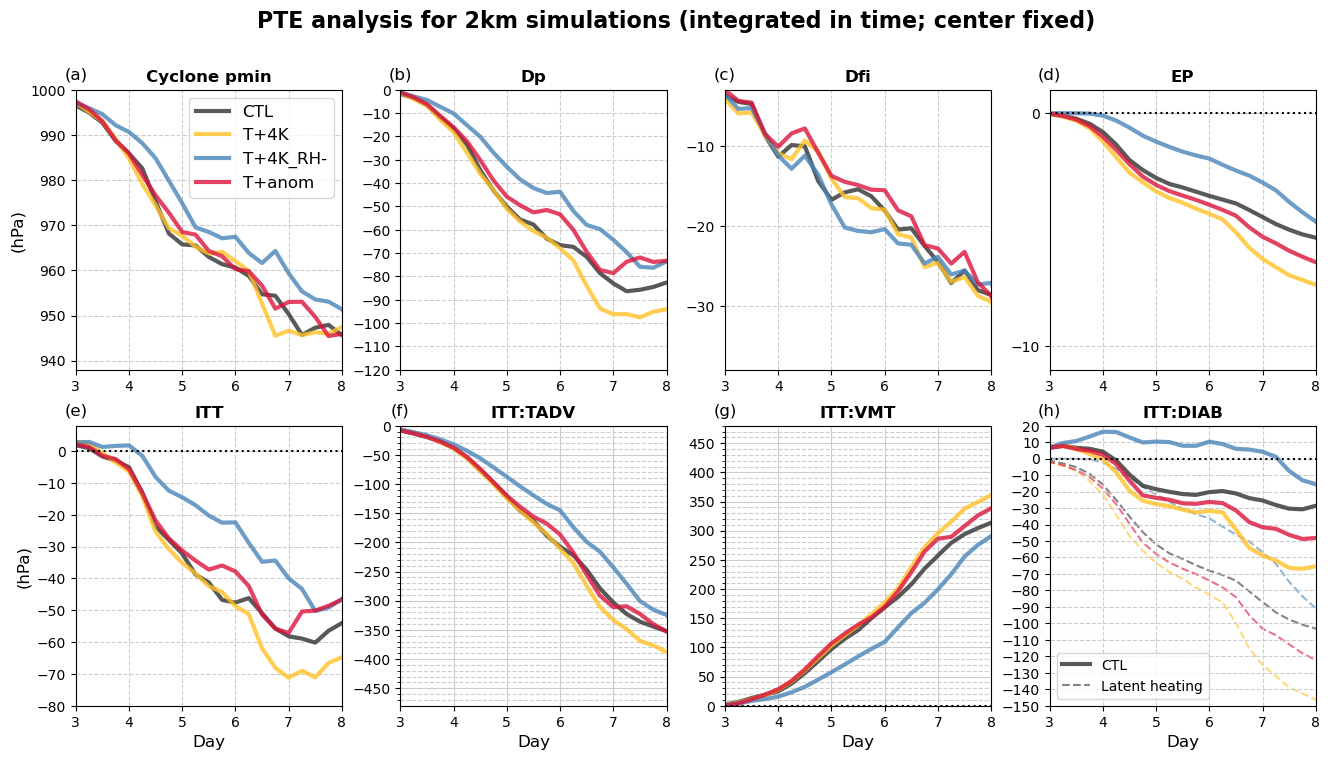

In [20]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

# For 2 km results

exp=exp2n
res='2km'

# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(16, 8)) 
ax0 = plt.subplot(2,4,1) 
ax1 = plt.subplot(2,4,2)    
ax2 = plt.subplot(2,4,3)    
ax3 = plt.subplot(2,4,4)    
ax4 = plt.subplot(2,4,5)    
ax5 = plt.subplot(2,4,6)    
ax6 = plt.subplot(2,4,7)   
ax7 = plt.subplot(2,4,8)    
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax0.plot(dur[exp[i]], pmin[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accdp[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accdfi[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax3.plot(dur[exp[i]], accep[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax4.plot(dur[exp[i]], accitt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax5.plot(dur[exp[i]], acctadv[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax6.plot(dur[exp[i]], accvmt[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiab[exp[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiablh[exp[i]], color=colors[i],
               linewidth=1.5, linestyle='dashed',label='Latent heating',alpha=0.6, zorder=1)
    if i == 1:
        ax7.legend(fontsize=10, loc='lower left')
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.8)
    
ax0.set_title('Cyclone pmin', weight='bold')
ax1.set_title('Dp', weight='bold')
ax2.set_title('Dfi', weight='bold')
ax3.set_title('EP', weight='bold')
ax4.set_title('ITT', weight='bold')
ax5.set_title('ITT:TADV', weight='bold')
ax6.set_title('ITT:VMT', weight='bold')
ax7.set_title('ITT:DIAB', weight='bold')
#ax[1,3].set_title('ITT:res')

ax0.set_xlim((3, 8))
ax1.set_xlim((3, 8))
ax2.set_xlim((3, 8))
ax3.set_xlim((3, 8))
ax4.set_xlim((3, 8))
ax5.set_xlim((3, 8))
ax6.set_xlim((3, 8))
ax7.set_xlim((3, 8))

ax0.set_ylim((938, 1000))
ax1.set_ylim((-120, 0))
#ax2.set_ylim((-120,  0))
#ax3.set_ylim((-120,  0))
#ax4.set_ylim(-120, 0)
ax2.set_ylim((-38,  -3))
ax3.set_ylim((-11,  1))
ax4.set_ylim(-80, 8)
ax5.set_ylim(-480, 0)
ax6.set_ylim(0, 480)
ax7.set_ylim(-150, 20)


ax4.set_xlabel('Day', fontsize=12)
ax5.set_xlabel('Day', fontsize=12)
ax6.set_xlabel('Day', fontsize=12)
ax7.set_xlabel('Day', fontsize=12)
#ax[1,3].set_xlabel('Day', fontsize=12)

ax0.set_ylabel('(hPa)', fontsize=12)
ax4.set_ylabel('(hPa)', fontsize=12)
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax3.yaxis.grid()
ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.yaxis.grid()
ax5.yaxis.grid()
ax6.yaxis.grid()
ax7.yaxis.grid()
#ax[1,3].yaxis.grid()
ax4.xaxis.grid()
ax5.xaxis.grid()
ax6.xaxis.grid()
ax7.xaxis.grid()

# Change major ticks to show every 20.
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax3.yaxis.set_major_locator(MultipleLocator(10))
ax4.yaxis.set_major_locator(MultipleLocator(10))
ax5.yaxis.set_major_locator(MultipleLocator(50))
ax6.yaxis.set_major_locator(MultipleLocator(50))
ax7.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 5. (20/4 = 5)
ax5.yaxis.set_minor_locator(AutoMinorLocator(5))
ax6.yaxis.set_minor_locator(AutoMinorLocator(5))

# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax0.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax2.grid(which='major', color='#CCCCCC', linestyle='--')
ax3.grid(which='major', color='#CCCCCC', linestyle='--')
ax4.grid(which='major', color='#CCCCCC', linestyle='--')
ax5.grid(which='major', color='#CCCCCC', linestyle='solid')
ax6.grid(which='major', color='#CCCCCC', linestyle='solid')
ax5.grid(which='minor', color='#CCCCCC', linestyle='--')
ax6.grid(which='minor', color='#CCCCCC', linestyle='--')
ax7.grid(which='major', color='#CCCCCC', linestyle='--')
#ax0.grid(which='minor', color='#CCCCCC', linestyle=':')


#ax[1,3].xaxis.grid()
#ax0.axhline(y=0,linestyle=':', color='k')
ax1.axhline(y=0,linestyle=':', color='k')
ax2.axhline(y=0,linestyle=':', color='k')
ax3.axhline(y=0,linestyle=':', color='k')
ax4.axhline(y=0,linestyle=':', color='k')
ax5.axhline(y=0,linestyle=':', color='k')
ax6.axhline(y=0,linestyle=':', color='k')
ax7.axhline(y=0,linestyle=':', color='k')
#ax[0,0].legend(ncol=2, loc='upper left', fontsize=13)
#ax[1].legend(ncol=2, loc='upper left')
ax0.legend(fontsize=12, loc='upper right')

plt.text(0, 1.08, '(a)', ha='center', va='top', transform=ax0.transAxes, fontsize=12) 
plt.text(0, 1.08, '(b)', ha='center', va='top', transform=ax1.transAxes, fontsize=12) 
plt.text(0, 1.08, '(c)', ha='center', va='top', transform=ax2.transAxes, fontsize=12) 
plt.text(0, 1.08, '(d)', ha='center', va='top', transform=ax3.transAxes, fontsize=12) 
plt.text(0, 1.08, '(e)', ha='center', va='top', transform=ax4.transAxes, fontsize=12) 
plt.text(0, 1.08, '(f)', ha='center', va='top', transform=ax5.transAxes, fontsize=12) 
plt.text(0, 1.08, '(g)', ha='center', va='top', transform=ax6.transAxes, fontsize=12) 
plt.text(0, 1.08, '(h)', ha='center', va='top', transform=ax7.transAxes, fontsize=12) 


#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
#ax0.tick_params(axis='both', which='major', labelsize=12)
#ax1.tick_params(axis='both', which='major', labelsize=12)
#ax2.tick_params(axis='both', which='major', labelsize=12)
#ax3.tick_params(axis='both', which='major', labelsize=12)
#ax4.tick_params(axis='both', which='major', labelsize=12)
#ax5.tick_params(axis='both', which='major', labelsize=12)
#ax6.tick_params(axis='both', which='major', labelsize=12)
#ax7.tick_params(axis='both', which='major', labelsize=12)

plt.subplots_adjust(wspace = 0.22, hspace=0.2)
fig.suptitle('PTE analysis for '+res+' simulations (integrated in time; center fixed)',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('FigS_cyclonePTEtimeseries_timeaggregated_Sim1234_'+res+'_Allterms_in_onefig_CCfixed.png',
#               bbox_inches='tight',dpi=100)

plt.show()



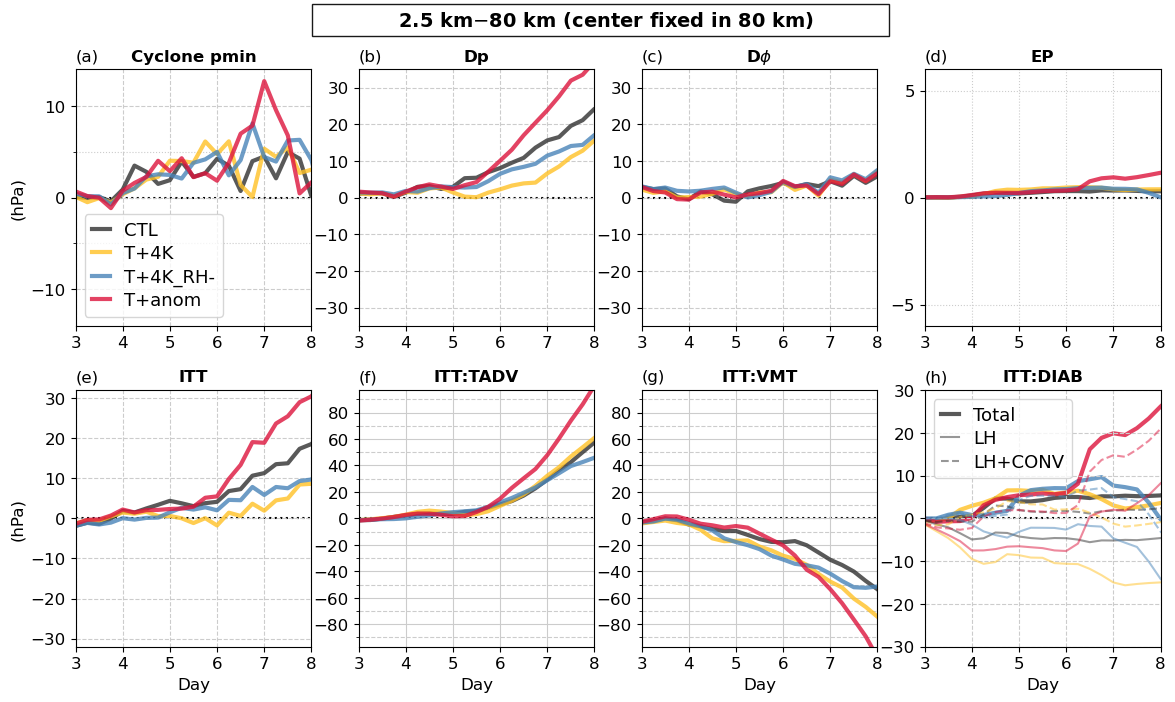

In [21]:
# For resolution sesitivity



# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig = plt.figure(figsize=(14,7.5)) 
ax0 = plt.subplot(2,4,1) 
ax1 = plt.subplot(2,4,2)    
ax2 = plt.subplot(2,4,3)    
ax3 = plt.subplot(2,4,4)    
ax4 = plt.subplot(2,4,5)    
ax5 = plt.subplot(2,4,6)    
ax6 = plt.subplot(2,4,7)   
ax7 = plt.subplot(2,4,8)    
    
#fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,5): # loop over simulations
    ax0.plot(dur[exp[i]], pmin[exp2n[i]]- pmin[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax1.plot(dur[exp[i]], accdp[exp2n[i]]-accdp[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax2.plot(dur[exp[i]], accdfi[exp2n[i]]-accdfi[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax3.plot(dur[exp[i]], accep[exp2n[i]]-accep[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax4.plot(dur[exp[i]], accitt[exp2n[i]]-accitt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax5.plot(dur[exp[i]], acctadv[exp2n[i]]-acctadv[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax6.plot(dur[exp[i]], accvmt[exp2n[i]]-accvmt[exp80[i]], color=colors[i],
               linewidth=3, label=expname[i], alpha=0.8)
    ax7.plot(dur[exp[i]], accdiab[exp2n[i]]-accdiab[exp80[i]], color=colors[i],
               linewidth=3, label='Total', alpha=0.8, zorder=1)
    ax7.plot(dur[exp[i]], accdiablh[exp2n[i]]-accdiablh[exp80[i]], color=colors[i],
               linewidth=1.5, linestyle='solid',label='LH',alpha=0.5, zorder=2)
    ax7.plot(dur[exp[i]], accdiabpc[exp2n[i]]+accdiablh[exp2n[i]]-accdiabpc[exp80[i]]-accdiablh[exp80[i]], color=colors[i],
              linewidth=1.5, linestyle='dashed',label='LH+CONV',alpha=0.5, zorder=2)

    if i == 1:
        ax7.legend(fontsize=13, loc='upper left',handlelength=1.0,labelspacing=0.3)
    #ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
    #           linewidth=3, label=expname[i], alpha=0.8)
    
ax0.set_title('Cyclone pmin',weight='bold')
ax1.set_title('Dp',weight='bold')
ax2.set_title('D'r'$\phi$',weight='bold')
ax3.set_title('EP',weight='bold')
ax4.set_title('ITT',weight='bold')
ax5.set_title('ITT:TADV',weight='bold')
ax6.set_title('ITT:VMT',weight='bold')
ax7.set_title('ITT:DIAB',weight='bold')


ax0.set_xlim((3, 8))
ax1.set_xlim((3, 8))
ax2.set_xlim((3, 8))
ax3.set_xlim((3, 8))
ax4.set_xlim((3, 8))
ax5.set_xlim((3, 8))
ax6.set_xlim((3, 8))
ax7.set_xlim((3, 8))

ax0.set_ylim((-14, 14))
ax1.set_ylim((-35, 35))
ax2.set_ylim((-35, 35))
ax3.set_ylim((-6, 6))
ax4.set_ylim((-32, 32))
ax5.set_ylim((-97, 97))
ax6.set_ylim((-97, 97))
ax7.set_ylim((-30, 30))

ax4.set_xlabel('Day', fontsize=12)
ax5.set_xlabel('Day', fontsize=12)
ax6.set_xlabel('Day', fontsize=12)
ax7.set_xlabel('Day', fontsize=12)

ax0.set_ylabel('(hPa)', fontsize=12)
ax4.set_ylabel('(hPa)', fontsize=12)
#ax[1,3].set_xlabel('Day', fontsize=12)

#ax0.set_ylabel('hPa', fontsize=12)
#ax4.set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax0.yaxis.grid()
ax1.yaxis.grid()
ax2.yaxis.grid()
ax3.yaxis.grid()
ax0.xaxis.grid()
ax1.xaxis.grid()
ax2.xaxis.grid()
ax3.xaxis.grid()
ax4.yaxis.grid()
ax5.yaxis.grid()
ax6.yaxis.grid()
ax7.yaxis.grid()
#ax[1,3].yaxis.grid()
ax4.xaxis.grid()
ax5.xaxis.grid()
ax6.xaxis.grid()
ax7.xaxis.grid()

# Change major ticks to show every 20.
ax0.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax2.yaxis.set_major_locator(MultipleLocator(10))
ax3.yaxis.set_major_locator(MultipleLocator(5))
ax4.yaxis.set_major_locator(MultipleLocator(10))
ax5.yaxis.set_major_locator(MultipleLocator(20))
ax6.yaxis.set_major_locator(MultipleLocator(20))
ax7.yaxis.set_major_locator(MultipleLocator(10))

# Change minor ticks to show every 5. (20/4 = 5)
ax0.yaxis.set_minor_locator(AutoMinorLocator(2))
ax5.yaxis.set_minor_locator(AutoMinorLocator(2))
ax6.yaxis.set_minor_locator(AutoMinorLocator(2))


# Turn grid on for both major and minor ticks and style minor slightly
# differently.
ax0.grid(which='major', color='#CCCCCC', linestyle='--')
ax1.grid(which='major', color='#CCCCCC', linestyle='--')
ax2.grid(which='major', color='#CCCCCC', linestyle='--')
ax3.grid(which='major', color='#CCCCCC', linestyle=':')
ax4.grid(which='major', color='#CCCCCC', linestyle='--')
ax5.grid(which='major', color='#CCCCCC', linestyle='solid')
ax6.grid(which='major', color='#CCCCCC', linestyle='solid')
ax5.grid(which='minor', color='#CCCCCC', linestyle='--')
ax6.grid(which='minor', color='#CCCCCC', linestyle='--')
ax7.grid(which='major', color='#CCCCCC', linestyle='--')
ax0.grid(which='minor', color='#CCCCCC', linestyle=':')


ax0.axhline(y=0,linestyle=':', color='k', zorder=0)
ax1.axhline(y=0,linestyle=':', color='k', zorder=0)
ax2.axhline(y=0,linestyle=':', color='k', zorder=0)
ax3.axhline(y=0,linestyle=':', color='k', zorder=0)
ax4.axhline(y=0,linestyle=':', color='k', zorder=0)
ax5.axhline(y=0,linestyle=':', color='k', zorder=0)
ax6.axhline(y=0,linestyle=':', color='k', zorder=0)
ax7.axhline(y=0,linestyle=':', color='k', zorder=0)
#ax0.legend(fontsize=13, loc='lower left') #bbox_to_anchor=(1.2,0.8))
ax0.legend(fontsize=13, loc='lower left',handlelength=1.0,labelspacing=0.3)

plt.text(0, 1.08, '(a)', ha='left', va='top', transform=ax0.transAxes, fontsize=12) 
plt.text(0, 1.08, '(b)', ha='left', va='top', transform=ax1.transAxes, fontsize=12) 
plt.text(0, 1.08, '(c)', ha='left', va='top', transform=ax2.transAxes, fontsize=12) 
plt.text(0, 1.08, '(d)', ha='left', va='top', transform=ax3.transAxes, fontsize=12) 
plt.text(0, 1.08, '(e)', ha='left', va='top', transform=ax4.transAxes, fontsize=12) 
plt.text(0, 1.08, '(f)', ha='left', va='top', transform=ax5.transAxes, fontsize=12) 
plt.text(0, 1.08, '(g)', ha='left', va='top', transform=ax6.transAxes, fontsize=12) 
plt.text(0, 1.08, '(h)', ha='left', va='top', transform=ax7.transAxes, fontsize=12) 

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax0.tick_params(axis='both', which='major', labelsize=12)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax3.tick_params(axis='both', which='major', labelsize=12)
ax4.tick_params(axis='both', which='major', labelsize=12)
ax5.tick_params(axis='both', which='major', labelsize=12)
ax6.tick_params(axis='both', which='major', labelsize=12)
ax7.tick_params(axis='both', which='major', labelsize=12)
#ax[1,3].tick_params(axis='both', which='major', labelsize=12)

ax0.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax1.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax2.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax3.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax4.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax5.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax6.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
ax7.set_xticks([3,4,5,6,7,8],[3,4,5,6,7,8])
  
fig.suptitle('            2.5 km'r'$-$''80 km (center fixed in 80 km)           ',fontsize=14, 
             bbox=dict(ec='k',
             fc='white',alpha=0.9), y= 0.96,
             weight='bold')
plt.subplots_adjust(wspace = 0.2, hspace=0.25)
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
plt.savefig('FigS6_cyclonePTEtimeseries_timeaggregated_Sim1234_'+res+'_Allterms_2km-80km_cyclonecenterfixed.png',
               bbox_inches='tight',dpi=100)

plt.show()



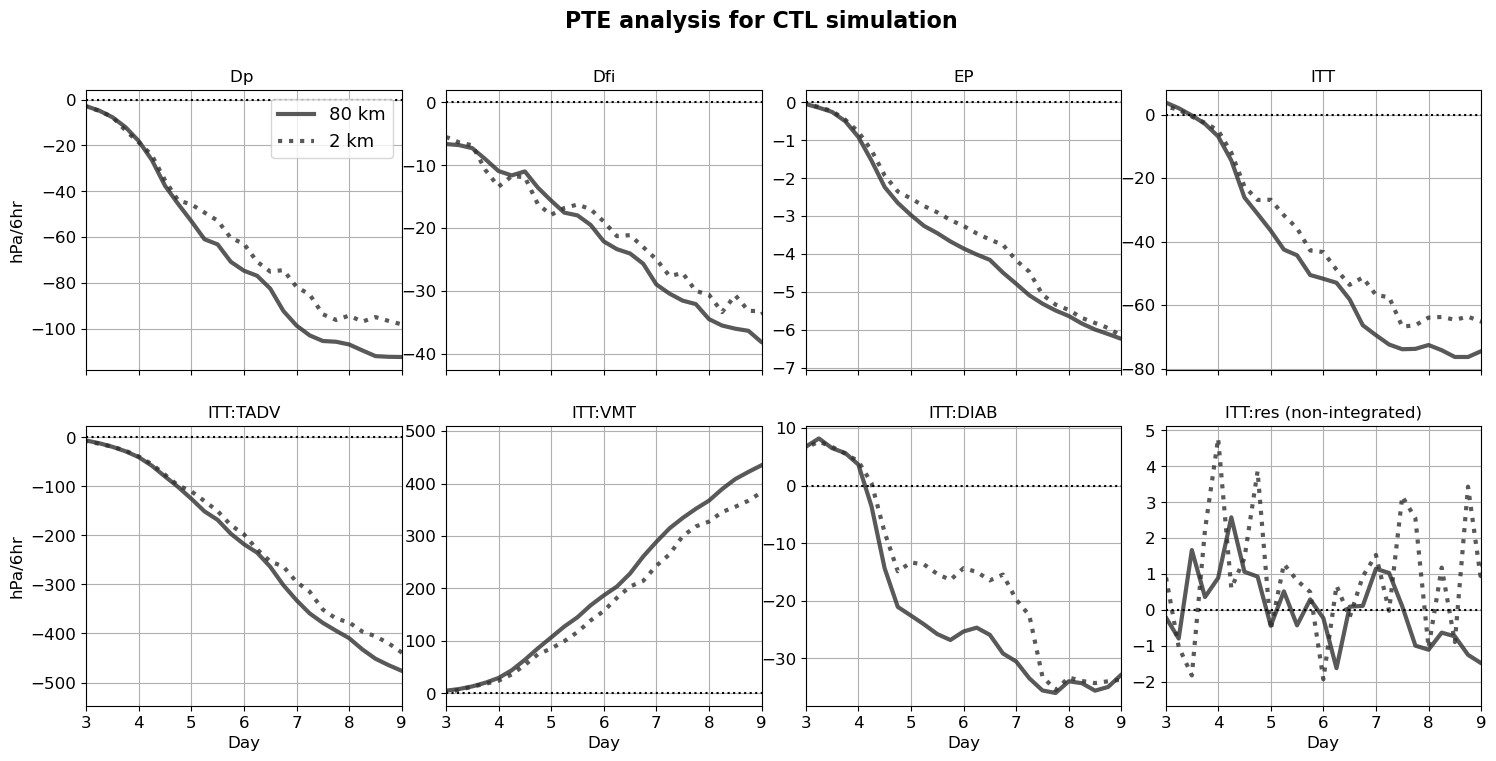

In [22]:
# For CTL 2km vs 80 km results

exp=exp80


# Separating the two equations #
plt.rcParams['savefig.facecolor']='white'
# Eq.1 ------
col = sns.color_palette()
col_pte = ['#436bad', 'orange','crimson',  'gray']
col_pte2 = [col[0], 'gray', col[4], 'gold', col[2], col[3]]

colors={1:'#303030',2:'#FFC125',3:'#4984b8',4:'crimson',5:'yellowgreen',6:'mediumpurple'}
#colors={1:'k',2:'orange',3:'royalblue',4:'crimson',5:'darkorange',6:'mediumseagreen'}
term = 'All'

fig, ax = plt.subplots(2, 4, figsize=(18,8), sharex=True, sharey=False)
for i in range(1,2): # loop over simulations
    exp=exp80
    ax[0,0].plot(dur[exp[i]], accdp[exp[i]], color=colors[i],
               linewidth=3,  label='80 km', alpha=0.8)
    ax[0,1].plot(dur[exp[i]], accdfi[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[0,2].plot(dur[exp[i]], accep[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[0,3].plot(dur[exp[i]], accitt[exp[i]], color=colors[i],
               linewidth=3, alpha=0.8)
    ax[1,0].plot(dur[exp[i]], acctadv[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,1].plot(dur[exp[i]], accvmt[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,2].plot(dur[exp[i]], accdiab[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=3,  alpha=0.8)
    exp=exp2
    ax[0,0].plot(dur[exp[i]], accdp[exp[i]], color=colors[i],
               linewidth=3,  linestyle='dotted', label='2 km', alpha=0.8)
    ax[0,1].plot(dur[exp[i]], accdfi[exp[i]], color=colors[i],
               linewidth=3, linestyle='dotted', alpha=0.8)
    ax[0,2].plot(dur[exp[i]], accep[exp[i]], color=colors[i],
               linewidth=3,  linestyle='dotted', alpha=0.8)
    ax[0,3].plot(dur[exp[i]], accitt[exp[i]], color=colors[i],
               linewidth=3, linestyle='dotted', alpha=0.8)
    ax[1,0].plot(dur[exp[i]], acctadv[exp[i]], color=colors[i],
               linewidth=3,  linestyle='dotted', alpha=0.8)
    ax[1,1].plot(dur[exp[i]], accvmt[exp[i]], color=colors[i],
               linewidth=3,  linestyle='dotted', alpha=0.8)
    ax[1,2].plot(dur[exp[i]], accdiab[exp[i]], color=colors[i],
               linewidth=3, linestyle='dotted', alpha=0.8)
    ax[1,3].plot(dur[exp[i]], eq2res[exp[i]], color=colors[i],
               linewidth=3,linestyle='dotted',  alpha=0.8)
    
ax[0,0].set_title('Dp ')
ax[0,1].set_title('Dfi')
ax[0,2].set_title('EP')
ax[0,3].set_title('ITT')
ax[1,0].set_title('ITT:TADV')
ax[1,1].set_title('ITT:VMT')
ax[1,2].set_title('ITT:DIAB')
ax[1,3].set_title('ITT:res (non-integrated)')




ax[1,0].set_xlabel('Day', fontsize=12)
ax[1,1].set_xlabel('Day', fontsize=12)
ax[1,2].set_xlabel('Day', fontsize=12)
ax[1,3].set_xlabel('Day', fontsize=12)

ax[0,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[1,0].set_ylabel('hPa/'+str(dt)+'hr', fontsize=12)
ax[0,0].set_xlim((3, 9))
#ax[1].set_xlim((3, 9))
#ax[2].set_xlim((3, 9))
#ax[3].set_xlim((3, 9))
ax[0,0].yaxis.grid()
ax[0,1].yaxis.grid()
ax[0,2].yaxis.grid()
ax[0,3].yaxis.grid()
ax[0,0].xaxis.grid()
ax[0,1].xaxis.grid()
ax[0,2].xaxis.grid()
ax[0,3].xaxis.grid()
ax[1,0].yaxis.grid()
ax[1,1].yaxis.grid()
ax[1,2].yaxis.grid()
ax[1,3].yaxis.grid()
ax[1,0].xaxis.grid()
ax[1,1].xaxis.grid()
ax[1,2].xaxis.grid()
ax[1,3].xaxis.grid()
ax[0,0].axhline(y=0,linestyle=':', color='k')
ax[0,1].axhline(y=0,linestyle=':', color='k')
ax[0,2].axhline(y=0,linestyle=':', color='k')
ax[0,3].axhline(y=0,linestyle=':', color='k')
ax[1,0].axhline(y=0,linestyle=':', color='k')
ax[1,1].axhline(y=0,linestyle=':', color='k')
ax[1,2].axhline(y=0,linestyle=':', color='k')
ax[1,3].axhline(y=0,linestyle=':', color='k')
ax[0,0].legend(ncol=1, loc='upper right', fontsize=13)
#ax[1].legend(ncol=2, loc='upper left')
#plt.legend(bbox_to_anchor=(1.0, 1), loc='upper center')

#plt.savefig('TimeseriesPTE_'+exp+'_'+str(dt)+'hrly_Eq1_upper'+str(int(p2level))+'hPa_box'+str(int(boxsize))+'_CyCen.png',
#               bbox_inches='tight',dpi=200)
ax[0,0].tick_params(axis='both', which='major', labelsize=12)
ax[0,1].tick_params(axis='both', which='major', labelsize=12)
ax[0,2].tick_params(axis='both', which='major', labelsize=12)
ax[0,3].tick_params(axis='both', which='major', labelsize=12)
ax[1,0].tick_params(axis='both', which='major', labelsize=12)
ax[1,1].tick_params(axis='both', which='major', labelsize=12)
ax[1,2].tick_params(axis='both', which='major', labelsize=12)
ax[1,3].tick_params(axis='both', which='major', labelsize=12)
plt.subplots_adjust(wspace = 0.14)
fig.suptitle('PTE analysis for CTL simulation',fontsize=16, weight='bold')
#fig.suptitle('Eq1: '+term+' Term ('+res+')',fontsize=14, weight='bold')
#plt.savefig('Fig_cyclonePTEtimeseries_CTLonly_timeintegrated_'+res+'_Allterms_in_onefig.png',
#               bbox_inches='tight',dpi=100)

plt.show()



In [23]:


print('Up to Day 7')
ts= 24
print('CTL, T+4K, T+anom')
print('dp', accdp[exp[1]][ts], accdp[exp[2]][ts], accdp[exp[4]][ts])
print('itt', accitt[exp[1]][ts], accitt[exp[2]][ts], accitt[exp[4]][ts])
print('tadv', acctadv[exp[1]][ts], acctadv[exp[2]][ts], acctadv[exp[4]][ts])
print('diab',accdiab[exp[1]][ts], accdiab[exp[2]][ts], accdiab[exp[4]][ts])

print('Up to Day 7.5')
ts= 26
print('CTL, T+4K, T+anom')
print('dp', accdp[exp[1]][ts], accdp[exp[2]][ts], accdp[exp[4]][ts])
print('itt', accitt[exp[1]][ts], accitt[exp[2]][ts], accitt[exp[4]][ts])
print('tadv', acctadv[exp[1]][ts], acctadv[exp[2]][ts], acctadv[exp[4]][ts])
print('diab',accdiab[exp[1]][ts], accdiab[exp[2]][ts], accdiab[exp[4]][ts])


print('Up to peak intensity (timestep depends on the experiment)')

Up to Day 7
CTL, T+4K, T+anom
dp -81.70847587629544 -86.22567296856823 -86.04968257411858
itt -56.81997419727435 -60.841814872514156 -62.233977782283446
tadv -295.0130302351614 -311.6526521988669 -319.28515851421616
diab -19.766587126957333 -51.20828544305238 -42.47181167989513
Up to Day 7.5
CTL, T+4K, T+anom
dp -93.66061242101523 -86.74917582962281 -86.08493765645032
itt -66.79048138573215 -59.74953153625853 -61.27948590522938
tadv -351.22724372564755 -340.1521381015072 -346.0826172045602
diab -33.140744762490414 -56.76246825017852 -49.24030941576526
Up to peak intensity (timestep depends on the experiment)
